In [1]:
#!pip install pandas
import pandas as pd
#!pip install numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_pickle('Data_Preparation.pkl')

In [4]:
df_text = pd.read_pickle('df_text.pkl')

In [5]:
df_num = pd.read_pickle('df_num.pkl')

In [6]:
df_category = pd.read_pickle('df_category.pkl')

# EDA - Explenatory Data Analysis

In [10]:
df_text.describe()

first    last             street      city               merchant
count    249782  249782             249782    249782                 249782
unique      550     803               3170      1272                    481
top     michael   smith  788 lawrence rest  brooklyn  fraud kerluke abshire
freq       4816    4222                206     11490                   2697

In [11]:
df_num.describe()

zip            lat           long      city_pop  \
count  249782.000000  249782.000000  249782.000000  2.497820e+05   
mean    10478.819290      41.339300     -74.434149  2.924889e+05   
min      1002.000000      39.021900     -80.499300  6.000000e+01   
25%      6790.000000      40.583900     -75.391800  1.310900e+04   
50%     10804.000000      40.862100     -74.005400  3.073800e+04   
75%     14615.000000      42.153200     -73.179600  1.249670e+05   
max     19611.000000      46.924800     -67.407300  2.504700e+06   
std      5247.064139       1.188322       2.418442  6.270697e+05   

           acct_num                     trans_date            amt  \
count  2.497820e+05                         249782  249782.000000   
mean   4.994804e+11  2019-11-16 01:00:28.853960960      67.930629   
min    3.585832e+08            2019-11-01 00:00:00       1.000000   
25%    2.501070e+11            2019-11-08 00:00:00       7.420000   
50%    5.016438e+11            2019-11-16 00:00:00      33.600000   
75%    7.527009e+11            2019-11-24 00:00:00      79.660000   
max    9.999583e+11            2019-11-30 00:00:00   16498.310000   
std    2.870267e+11                            NaN     173.142715   

            is_fraud      merch_lat     merch_long            age  
count  249782.000000  249782.000000  249782.000000  249782.000000  
mean        0.005569      41.340106     -74.434125      45.728147  
min         0.000000      38.050914     -81.462815      16.000000  
25%         0.000000      40.361485     -75.591588      31.000000  
50%         0.000000      41.133853     -74.187823      43.000000  
75%         0.000000      42.149156     -73.010321      57.000000  
max         1.000000      47.906075     -66.409339      97.000000  
std         0.074417       1.319480       2.487703      17.940986

In [12]:
df_category.describe()

gender   state                    profile  \
count   249782  249782                     249782   
unique       2       9                         12   
top          f      ny  adults 2550 female urban    
freq    128414   86426                      70121   

                               trans_num      category     day is_weekend  \
count                             249782        249782  249782     249782   
unique                            249782            14      30          2   
top     0000addfb24ff48ee172d700d65d81c5  shopping net      30       True   
freq                                   1        129310   22435     213737   

        issuer job_category age_category location age_range time_category  
count   249782       249782       249782   249782    249782        249782  
unique       7           16            2        2         6             4  
top       Visa           IT       adults    urban     45-69       Evening  
freq     66286        52218       219359   236868     89972         83914

# Data Protocol

In [22]:
df_protocol = df.copy()

In [23]:
df_text_copy = df_text.copy()
df_num_copy = df_num.copy()
df_category_copy = df_category.copy()

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

# Identify object (categorical) columns
categorical_cols = df_protocol.select_dtypes(include=['object', 'category', 'string']).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_protocol[col] = le.fit_transform(df_protocol[col])

In [27]:
df_protocol

first  last  gender  street  city  state   zip     lat     long    \
185       329    265     0     1876    111    4     7005  40.9115 -74.4140   
186       329    265     0     1876    111    4     7005  40.9115 -74.4140   
187       329    265     0     1876    111    4     7005  40.9115 -74.4140   
188       329    265     0     1876    111    4     7005  40.9115 -74.4140   
189       329    265     0     1876    111    4     7005  40.9115 -74.4140   
...        ...   ...     ...     ...   ...    ...    ...      ...      ...   
1364531   237    205     1     3097    174    5    12414  42.2276 -73.8985   
1364532   237    205     1     3097    174    5    12414  42.2276 -73.8985   
1364533   237    205     1     3097    174    5    12414  42.2276 -73.8985   
1364534   237    205     1     3097    174    5    12414  42.2276 -73.8985   
1364535   237    205     1     3097    174    5    12414  42.2276 -73.8985   

         city_pop    acct_num    profile  trans_num trans_date  category  \
185        15269   826475243361     9      208124   2019-11-09     11      
186        15269   826475243361     9      230720   2019-11-11     11      
187        15269   826475243361     9      168798   2019-11-23     11      
188        15269   826475243361     9       14038   2019-11-24     11      
189        15269   826475243361     9      196992   2019-11-08     11      
...           ...           ...      ...        ...        ...       ...   
1364531    10510   846920444376     7      117789   2019-11-27     12      
1364532    10510   846920444376     7      235888   2019-11-02     12      
1364533    10510   846920444376     7       16564   2019-11-30     12      
1364534    10510   846920444376     7      103169   2019-11-27     12      
1364535    10510   846920444376     7      148497   2019-11-10     12      

           amt   is_fraud  merchant  merch_lat  merch_long  day  is_weekend  \
185       81.83      0        412    41.497516  -74.258973   8       True     
186       68.48      0        336    40.661566  -73.849180  10       True     
187        9.54      0        162    41.655939  -75.234739  22       True     
188        2.93      0        270    40.062355  -74.923742  23       True     
189        1.30      0        133    41.285106  -74.645948   7       True     
...         ...       ...       ...        ...         ...  ...         ...   
1364531  223.34      0        326    41.833756  -74.700726  26       True     
1364532   53.08      0        240    41.820045  -74.555250   1      False     
1364533  121.28      0        216    42.991588  -73.760047  29       True     
1364534   66.31      0         93    42.047309  -73.327625  26       True     
1364535   79.09      0        152    42.359574  -74.229708   9       True     

         issuer  job_category  age_category  location  age  age_range  \
185         6         13             1           1     22       0       
186         6         13             1           1     22       0       
187         6         13             1           1     22       0       
188         6         13             1           1     22       0       
189         6         13             1           1     22       0       
...         ...           ...           ...       ...  ...        ...   
1364531     2          7             0           1     57       3       
1364532     2          7             0           1     57       3       
1364533     2          7             0           1     57       3       
1364534     2          7             0           1     57       3       
1364535     2          7             0           1     57       3       

         time_category  
185            1        
186            1        
187            0        
188            1        
189            0        
...                ...  
1364531        2        
1364532        3        
1364533        3        
1364534        2        
1364535        3        

[249782 rows x 29 columns]

In [28]:
#Type of data 
df_protocol.dtypes.to_excel ("df_datatype.xlsx", sheet_name='data_types')

#Maximum points 
df_protocol.max().to_excel("df_max.xlsx", sheet_name='max')

#Minimum points 
df_protocol.min().to_excel("df_min.xlsx", sheet_name='min')
        
#Isnull values 
df_protocol.isnull().to_excel("df_isnull.xlsx", sheet_name='isnull')

#unique values 
df_protocol.nunique().to_excel("df_nunique.xlsx", sheet_name='nunique')

# Descriptive Statistics

Automated reports

### AutoViz

In [39]:
# !pip install autoviz

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
first of type=string is not classified
last of type=string is not classified
street of type=string is not classified
city of type=string is not classified
merchant of type=string is not classified
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  12
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time 

Number of All Scatter Plots = 15


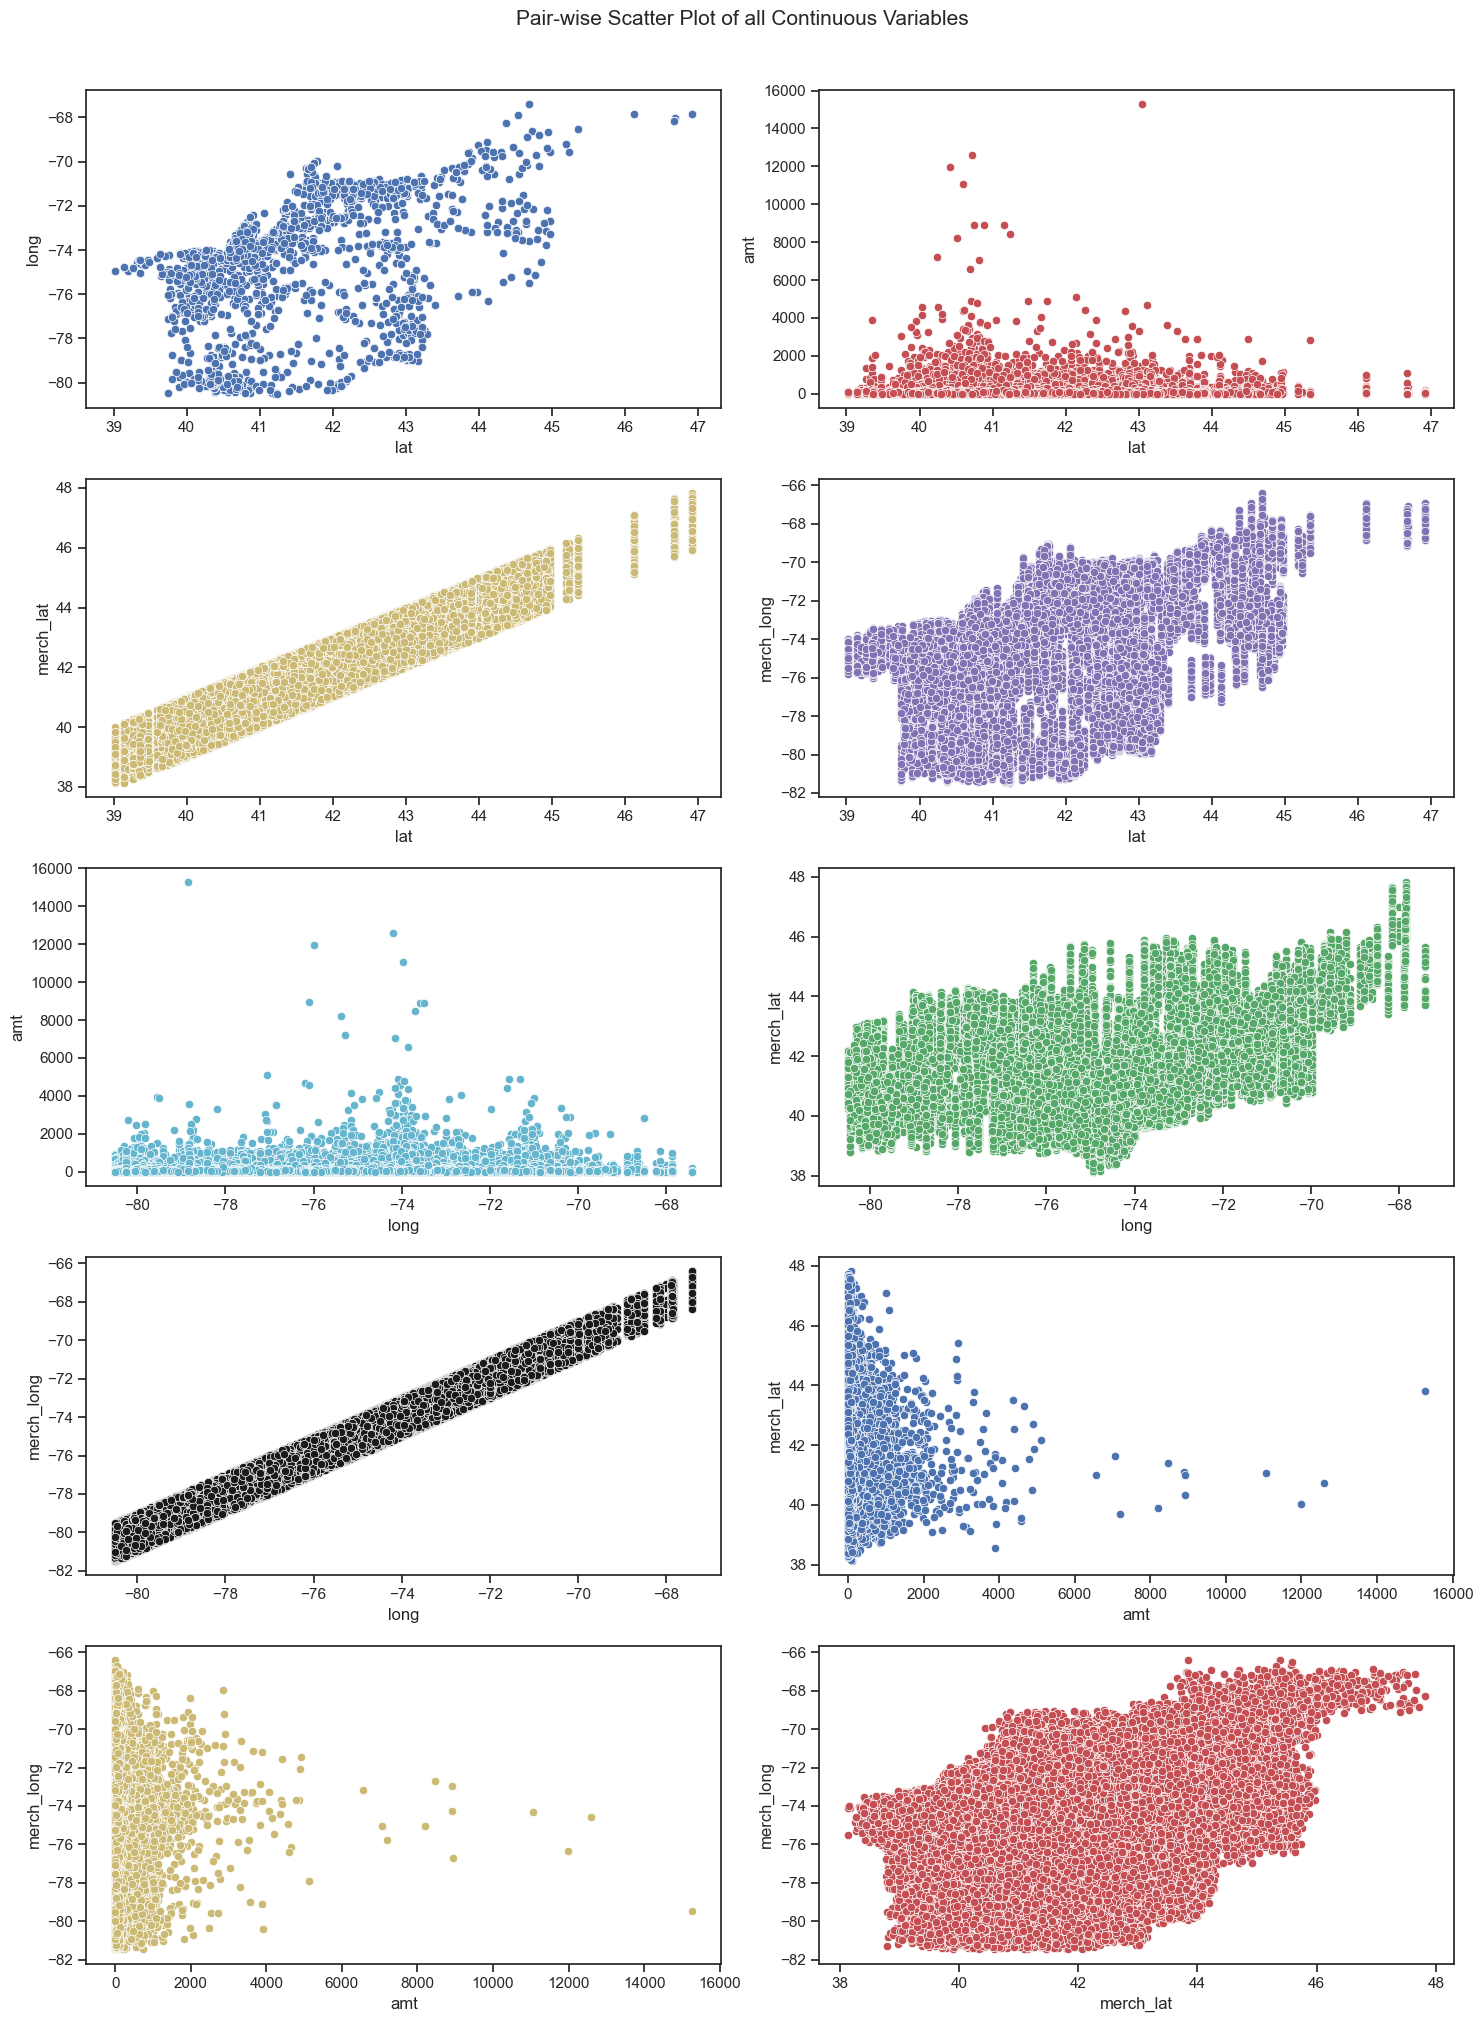

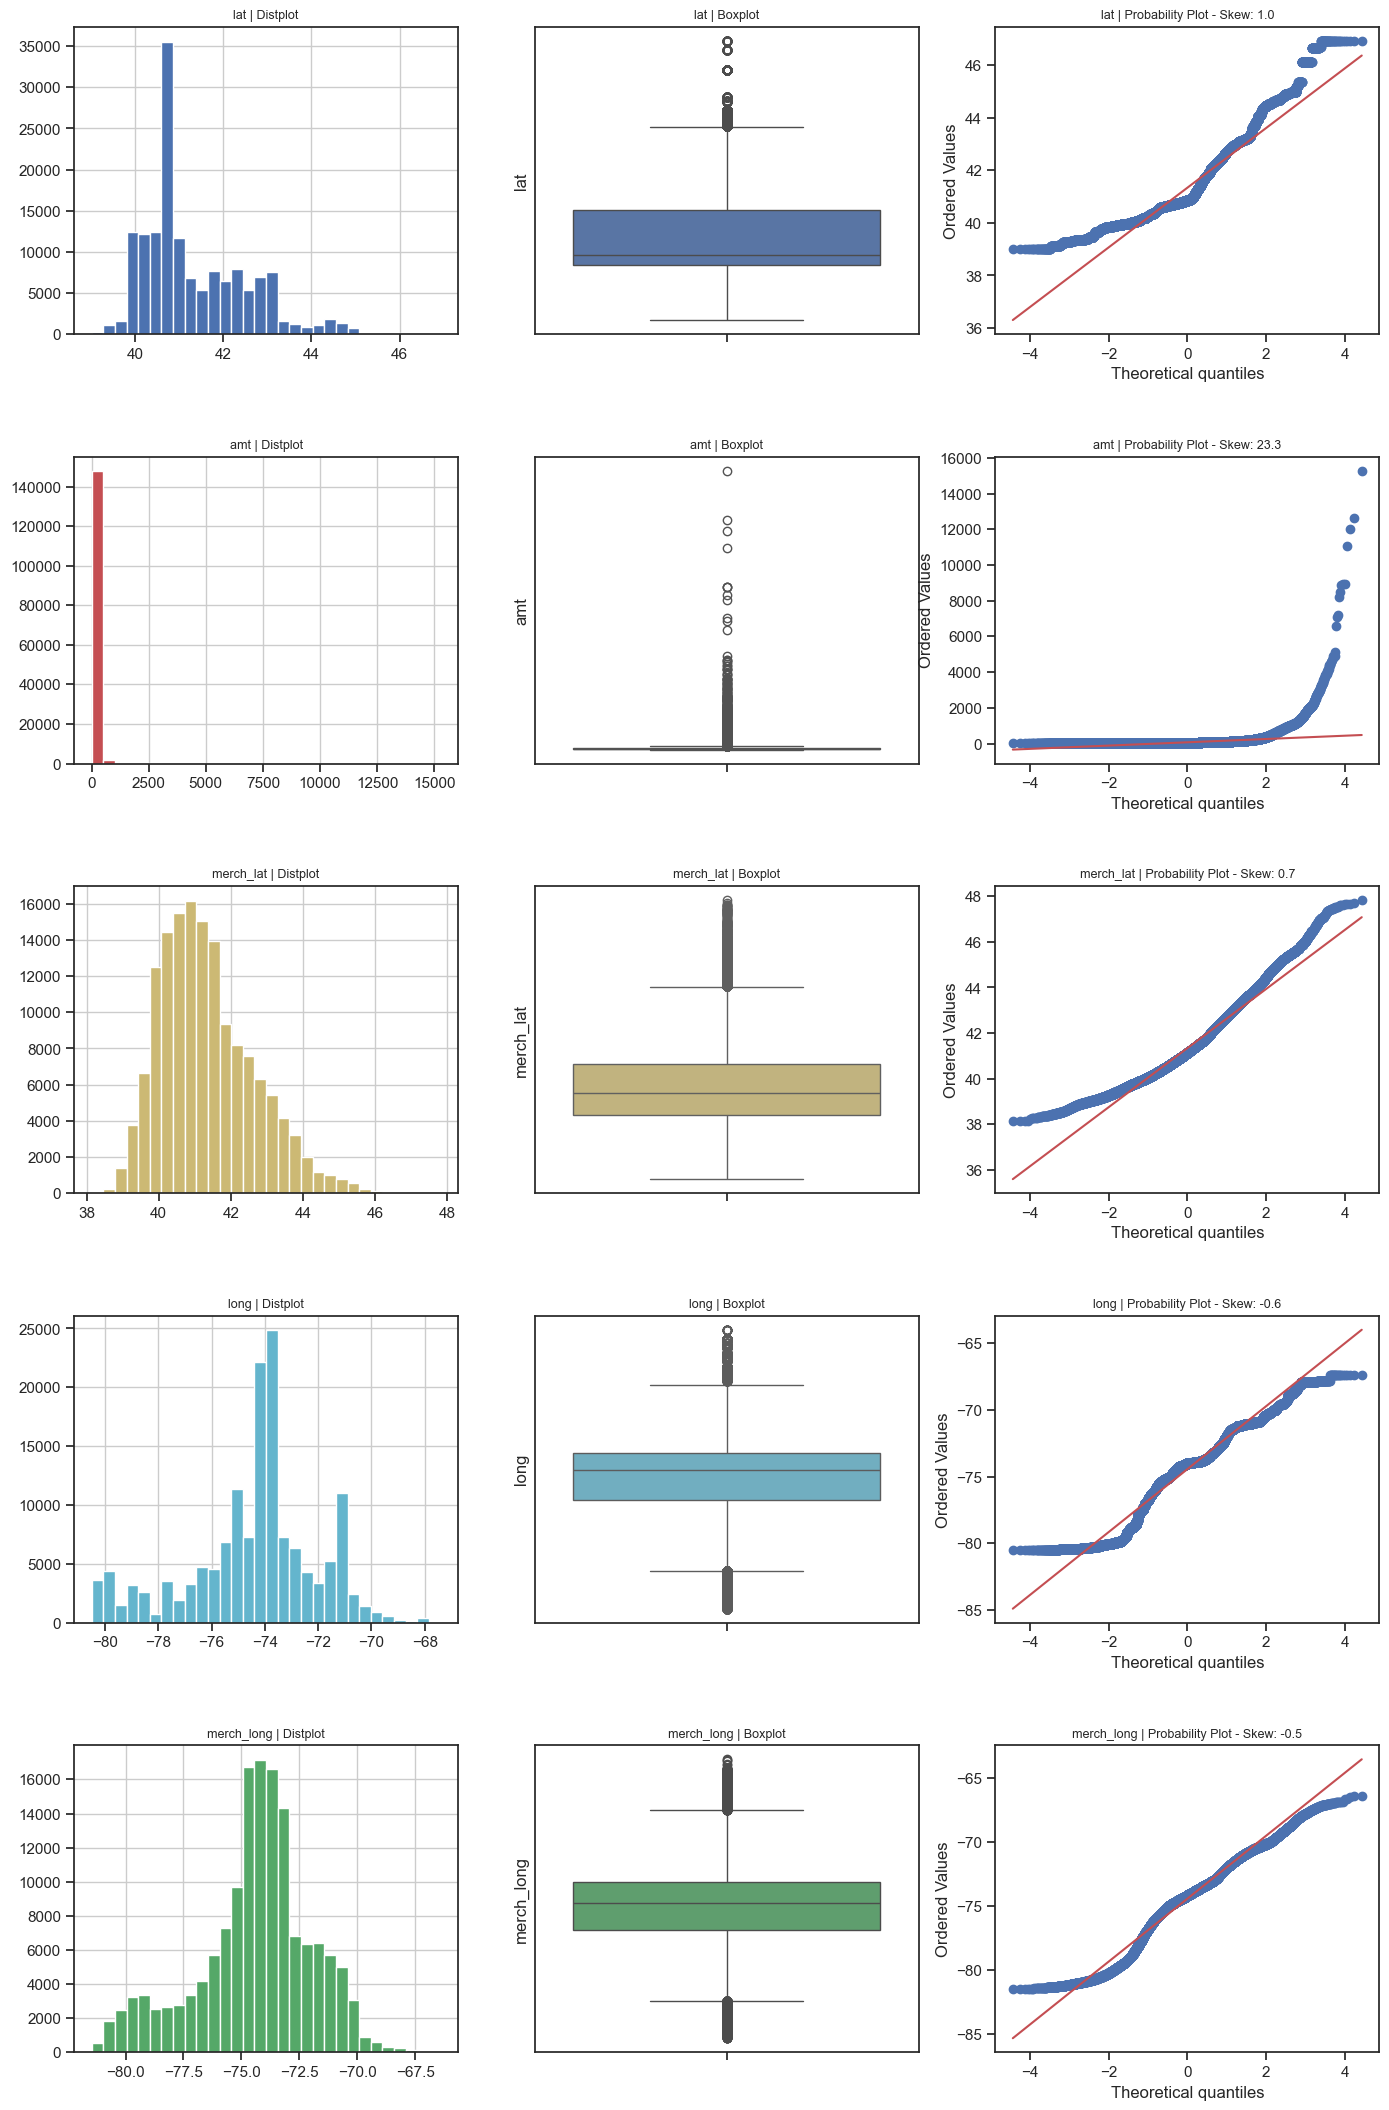

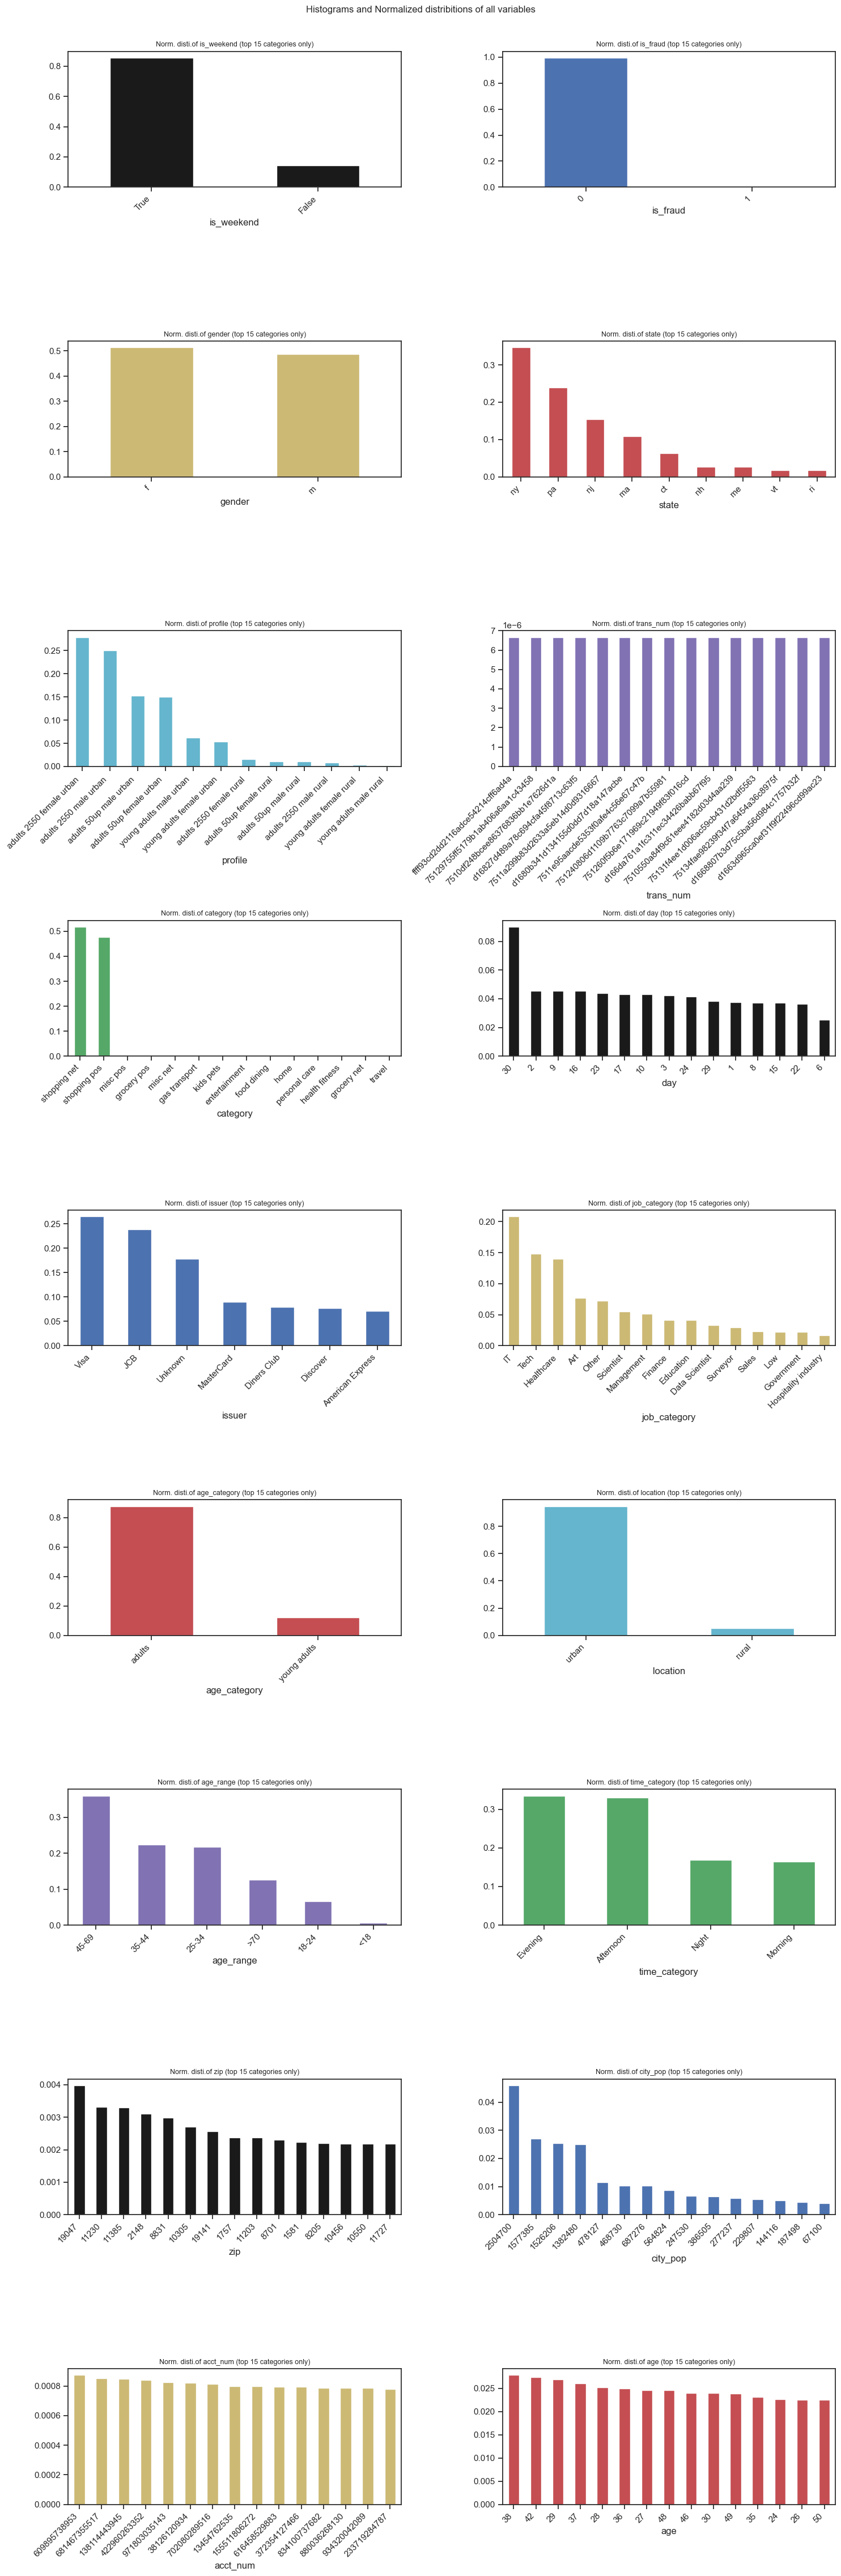

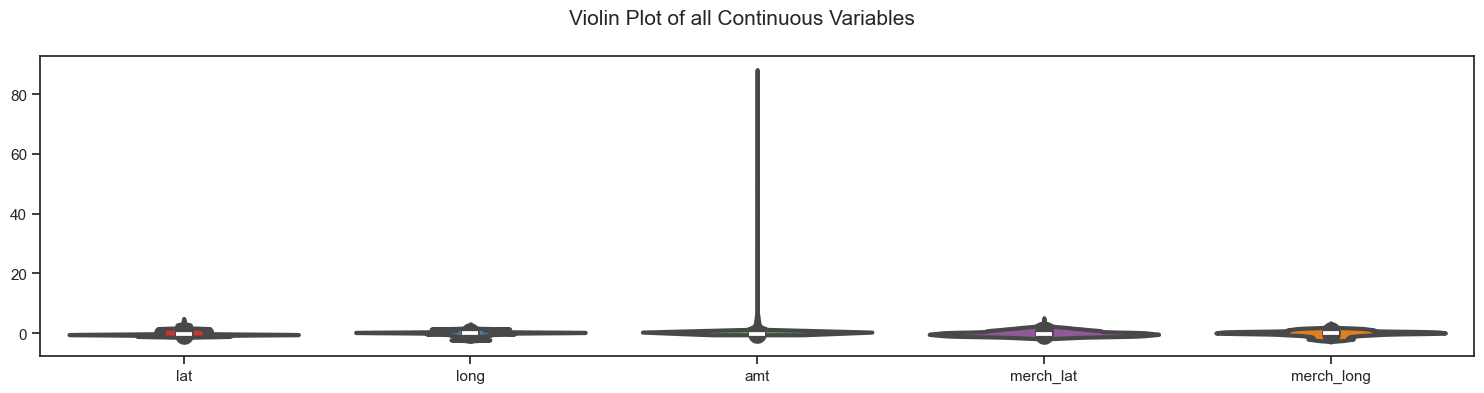

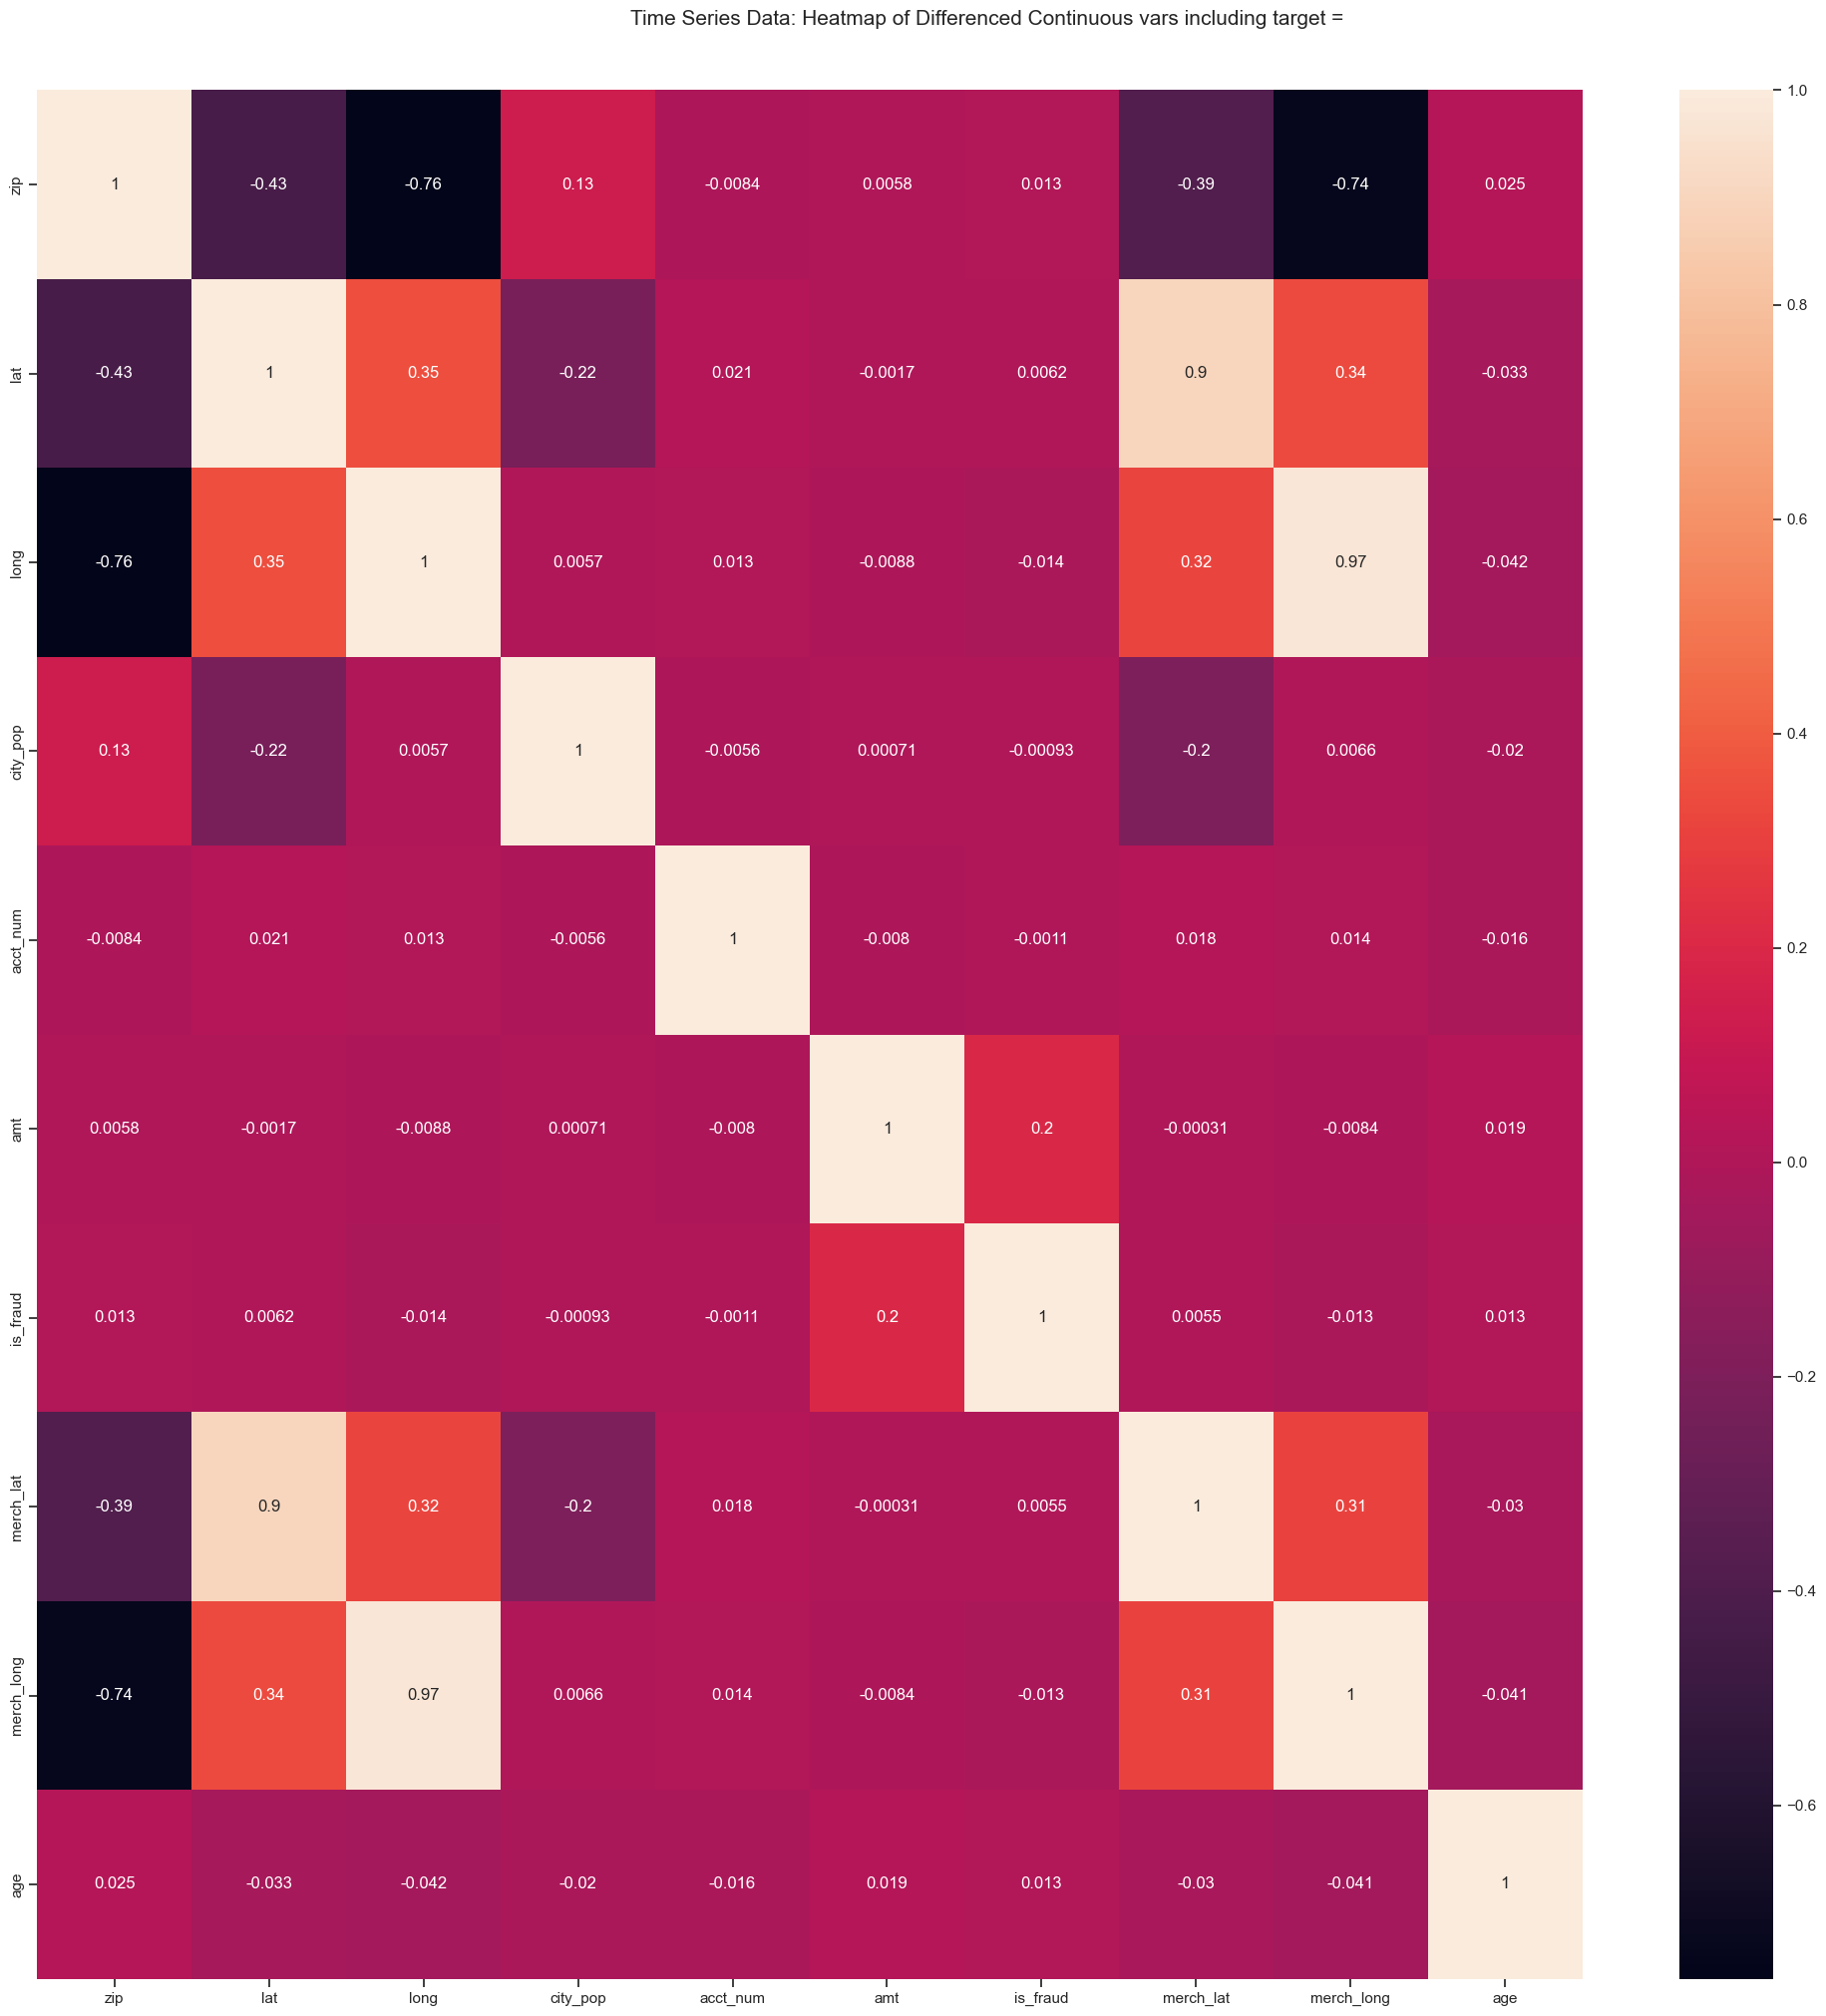

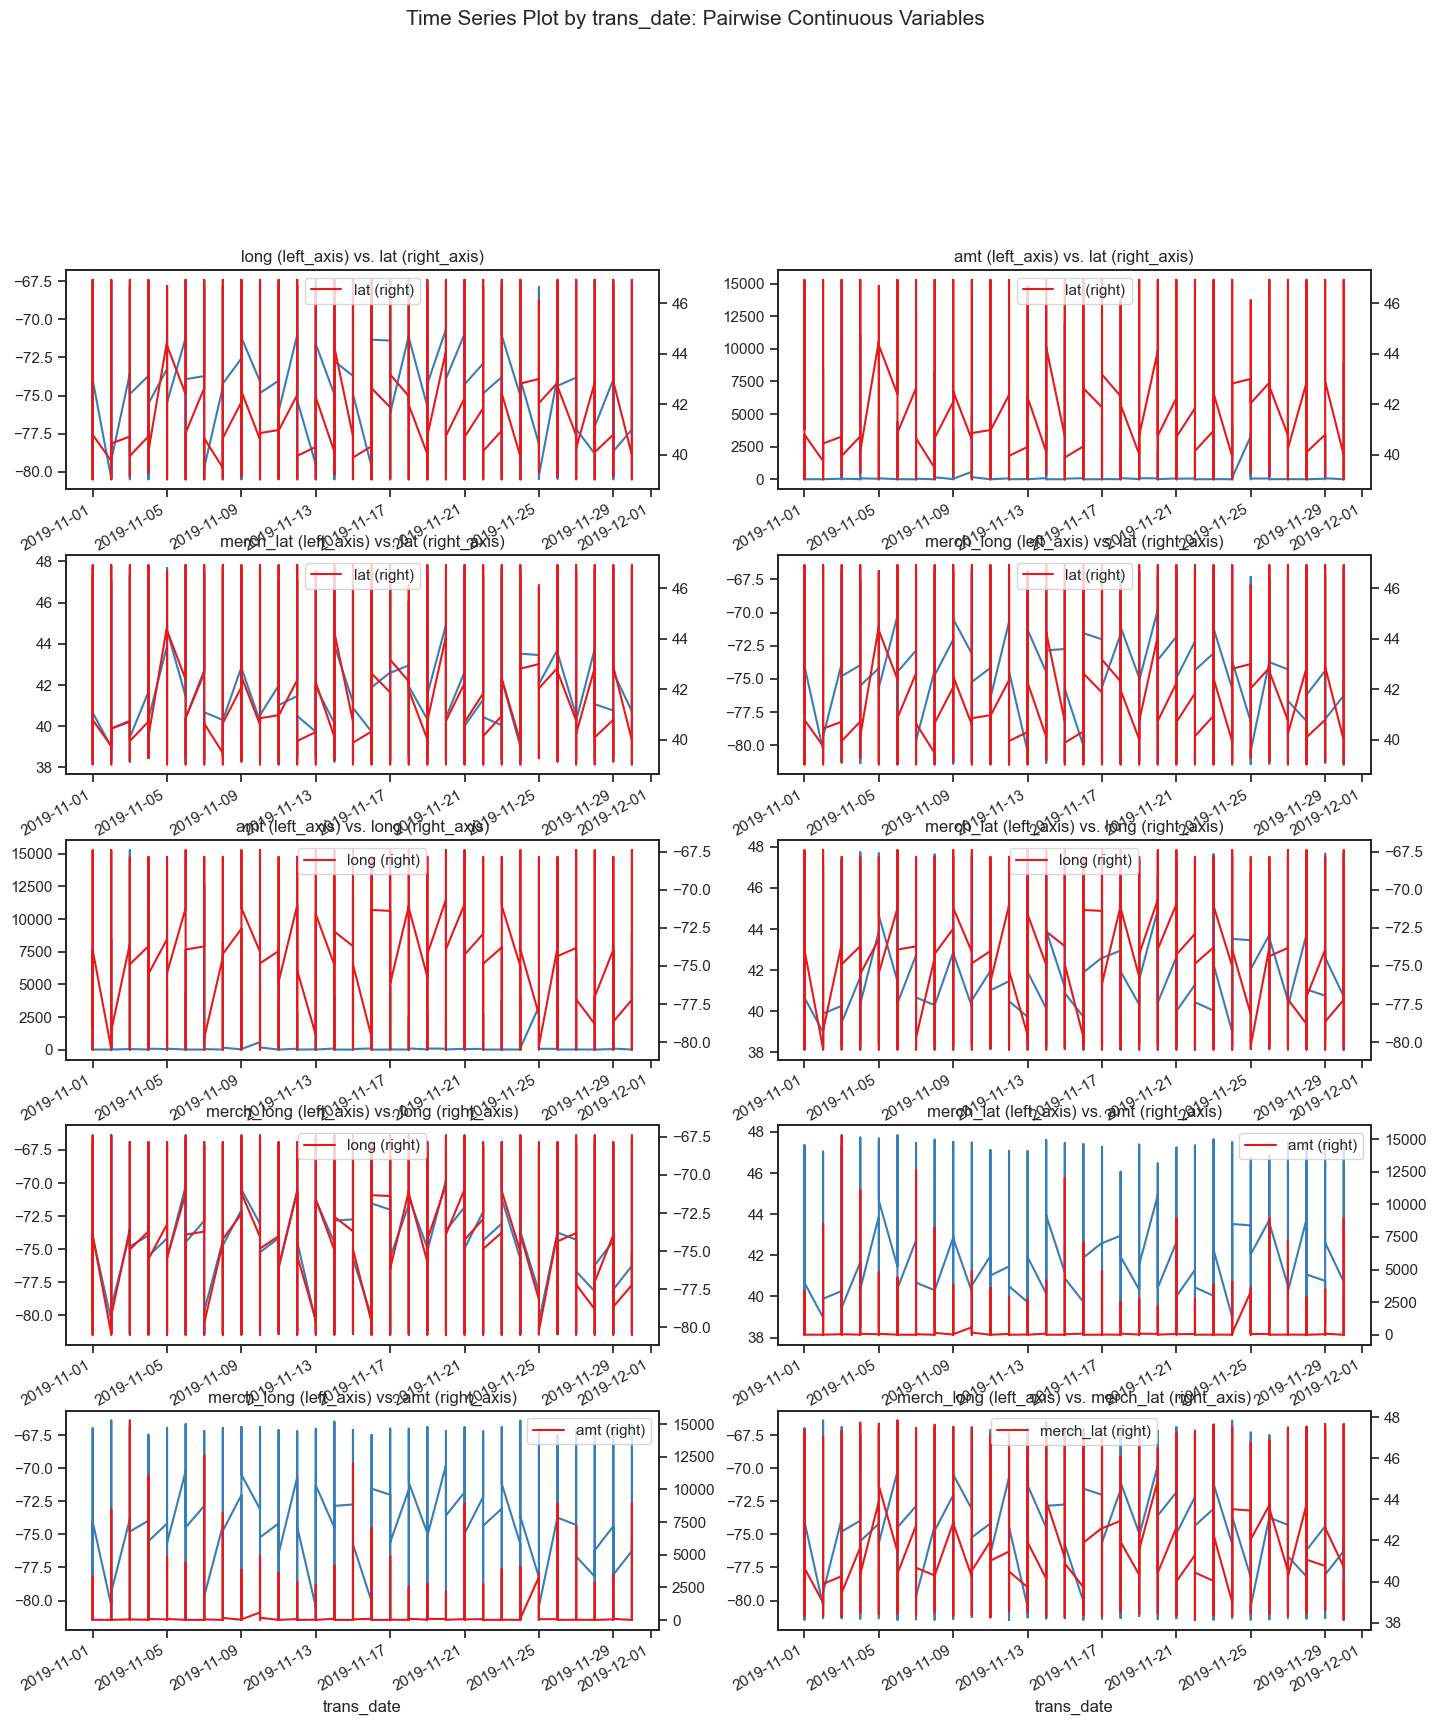

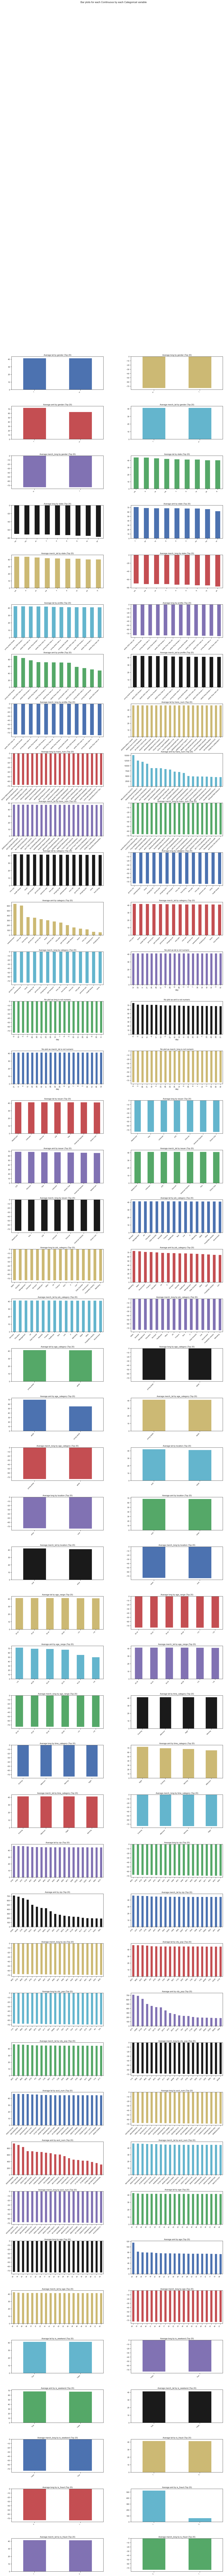

All Plots done
Time to run AutoViz = 26 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


first       last   gender               street                \
41026      jasmine  williams    f    6515 kimberly stravenue suite 063   
1298751    michael    norton    m                32651 rasmussen wells   
722280      kendra      ward    f            2714 russo walks apt  679   
635347   elizabeth    miller    f                       349 smith ford   
22542       joseph      hess    m          82035 pamela curve apt  358   
...            ...       ...    ...                                ...   
1261287      mindy     grant    f                     436 goodman hill   
1201602  stephanie     mcgee    f                    540 kristine isle   
43258     samantha    bishop    f         95593 robert alley suite 145   
534119        sara       lee    f              759 eric walks apt  898   
858824       jerry    harris    m                 39900 gardner corner   

                city        state   zip     lat     long    city_pop  \
41026              acushnet   ma    2743  41.6997 -70.9087     10307   
1298751             malvern   pa   19355  40.0468 -75.5310     24760   
722280                bronx   ny   10467  40.8737 -73.8712   1382480   
635347   whitehouse station   nj    8889  40.6156 -74.7724     10063   
22542            binghamton   ny   13901  42.1463 -75.8865     82318   
...                     ...   ...    ...      ...      ...       ...   
1261287         bethel park   pa   15102  40.3210 -80.0398     29529   
1201602         jersey city   nj    7302  40.7221 -74.0469    247530   
43258            fall river   ma    2724  41.6850 -71.1748     88252   
534119         philadelphia   pa   19131  39.9845 -75.2282   1526206   
858824          martinsburg   pa   16662  40.2951 -78.3244      6040   

           acct_num             profile            \
41026      8554878494   adults 2550 female urban    
1298751  371431678568     adults 50up male urban    
722280   710401927361   adults 2550 female urban    
635347   615663412498   adults 2550 female urban    
22542    430398617982     adults 2550 male urban    
...               ...                         ...   
1261287  988245651598   adults 50up female urban    
1201602  557450925139  young adults female urban    
43258    962153808128   adults 2550 female urban    
534119   394318279573  young adults female urban    
858824   997917536399     adults 2550 male urban    

                    trans_num             trans_date    category      amt   \
41026    b970d620d7a275108b71e42d5283b788 2019-11-30  shopping pos    7.38   
1298751  76c7459ed4f5223a77607550024fa4b8 2019-11-21  shopping pos   14.46   
722280   e3b5b3c4734ab6f5b97e47541fd7a1db 2019-11-28  shopping pos   82.36   
635347   f2b32bcc407ef3656bb2e7f33a7b67a4 2019-11-30  shopping pos  126.11   
22542    e48a688c55de3b20af27ede4788c4052 2019-11-19  shopping net   59.74   
...                                   ...        ...           ...     ...   
1261287  e292c165bd5b9a37535c7ebb2bce0957 2019-11-16  shopping pos   55.69   
1201602  5e4924a87442121fdcaaf4f24b1aa6a5 2019-11-30  shopping net    7.77   
43258    7a48c58e1e5d0f868e770d0c0d96a619 2019-11-07  shopping net   55.33   
534119   1fe5aa27ad0c4f91734341d6c2b821a0 2019-11-30  shopping net   12.37   
858824   6f3cd2fc79b60a91efd2c2e5e4de9e1f 2019-11-07  shopping net    8.94   

         is_fraud                 merchant                 merch_lat  \
41026        0                          fraud friesen inc  42.589415   
1298751      0        fraud douglas  schneider and turner  39.720281   
722280       0                     fraud pfeffer and sons  40.865636   
635347       0              fraud roob  conn and tremblay  40.003287   
22542        0     fraud stanton  jakubowski and baumbach  42.469806   
...           ...                                     ...        ...   
1261287      0                             fraud mohr inc  41.295866   
1201602      0           fraud towne  greenholt and koepp  41.430934   
43258        0                    

In [29]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(df)

# Target Value

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

Categorial 2 classes

<Axes: xlabel='is_fraud', ylabel='count'>

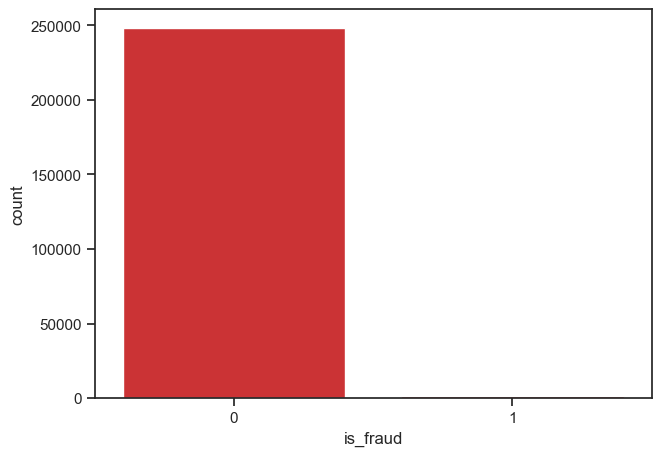

In [31]:
sb.countplot(x='is_fraud', data=df)

In [32]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# # Display result
# print(age_group_aggregation)

In [33]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['age_range', 'is_fraud']).size().reset_index(name='count')

# Calculate the total count per age_range
total_counts = age_group_aggregation.groupby('age_range')['count'].transform('sum')

# Calculate the percentage of fraud cases (is_fraud == 1)
age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['age_range', 'fraud_percentage']]

# Display result
print(fraud_percentage_df)

   age_range  fraud_percentage
1       <18       0.000000    
3     18-24       0.763860    
5     25-34       0.558845    
7     35-44       0.344551    
9     45-69       0.534611    
11      >70       0.908976    


In [34]:
# Aggregate the age groups with fraud count
age_group_aggregation = df.groupby(['category', 'is_fraud']).size().reset_index(name='count')

# Calculate the total count per age_range
total_counts = age_group_aggregation.groupby('category')['count'].transform('sum')

# Calculate the percentage of fraud cases (is_fraud == 1)
age_group_aggregation['fraud_percentage'] = ((age_group_aggregation['count'] / total_counts) * 100)

# Filter only fraud cases (is_fraud == 1) for displaying fraud percentage
fraud_percentage_df = age_group_aggregation[age_group_aggregation['is_fraud'] == 1][['category', 'fraud_percentage']]

# Display result
print(fraud_percentage_df)

       category     fraud_percentage
1    entertainment     100.000000   
3      food dining     100.000000   
5    gas transport     100.000000   
7      grocery net     100.000000   
9      grocery pos     100.000000   
11  health fitness     100.000000   
13            home     100.000000   
15       kids pets     100.000000   
17        misc net     100.000000   
19        misc pos       9.851301   
21   personal care     100.000000   
23    shopping net       0.228907   
25    shopping pos       0.146976   
27          travel     100.000000   


In [116]:
# df_category.head()

# dummies

In [231]:
# columns_to_convert = [ 'is_fraud', 'gender', 'is_weekend', 'is_suspicious', 'age_category', 'location', 'profile_category']
# df_dummy = df[columns_to_convert]  # Correct way to select multiple columns

In [35]:
df.head()

first     last   gender            street             city   state  \
185  kristina  gilbert    f    59404 steve mews suite 580  boonton   nj    
186  kristina  gilbert    f    59404 steve mews suite 580  boonton   nj    
187  kristina  gilbert    f    59404 steve mews suite 580  boonton   nj    
188  kristina  gilbert    f    59404 steve mews suite 580  boonton   nj    
189  kristina  gilbert    f    59404 steve mews suite 580  boonton   nj    

      zip    lat     long   city_pop    acct_num    \
185  7005  40.9115 -74.414    15269   826475243361   
186  7005  40.9115 -74.414    15269   826475243361   
187  7005  40.9115 -74.414    15269   826475243361   
188  7005  40.9115 -74.414    15269   826475243361   
189  7005  40.9115 -74.414    15269   826475243361   

              profile                       trans_num             trans_date  \
185  young adults female urban   d551518dc69441dae803bb711b97c9ee 2019-11-09   
186  young adults female urban   ec83997c27461bf8a1a989021e4df9fe 2019-11-11   
187  young adults female urban   acdb36bf499af78ea13b2e8772da0d0c 2019-11-23   
188  young adults female urban   0e5ec24d278b397d21675e46042778c6 2019-11-24   
189  young adults female urban   c9d221acd26a21dfce4b7f79fe0dfcc2 2019-11-08   

       category     amt   is_fraud                 merchant                 \
185  shopping net  81.83      0     fraud stanton  jakubowski and baumbach   
186  shopping net  68.48      0                         fraud predovic inc   
187  shopping net   9.54      0                        fraud heathcote llc   
188  shopping net   2.93      0            fraud little  gutmann and lynch   
189  shopping net   1.30      0                   fraud gleason macejkovic   

     merch_lat  merch_long day  is_weekend issuer job_category  age_category  \
185  41.497516  -74.258973   9     True     Visa    Scientist   young adults   
186  40.661566  -73.849180  11     True     Visa    Scientist   young adults   
187  41.655939  -75.234739  23     True     Visa    Scientist   young adults   
188  40.062355  -74.923742  24     True     Visa    Scientist   young adults   
189  41.285106  -74.645948   8     True     Visa    Scientist   young adults   

    location  age age_range time_category  
185   urban   22     18-24       Evening   
186   urban   22     18-24       Evening   
187   urban   22     18-24     Afternoon   
188   urban   22     18-24       Evening   
189   urban   22     18-24     Afternoon

In [36]:
columns_to_convert = [ 'is_fraud', 'gender', 'is_weekend', 'age_category', 'location',]
df_dummy = df[columns_to_convert]  # Correct way to select multiple columns

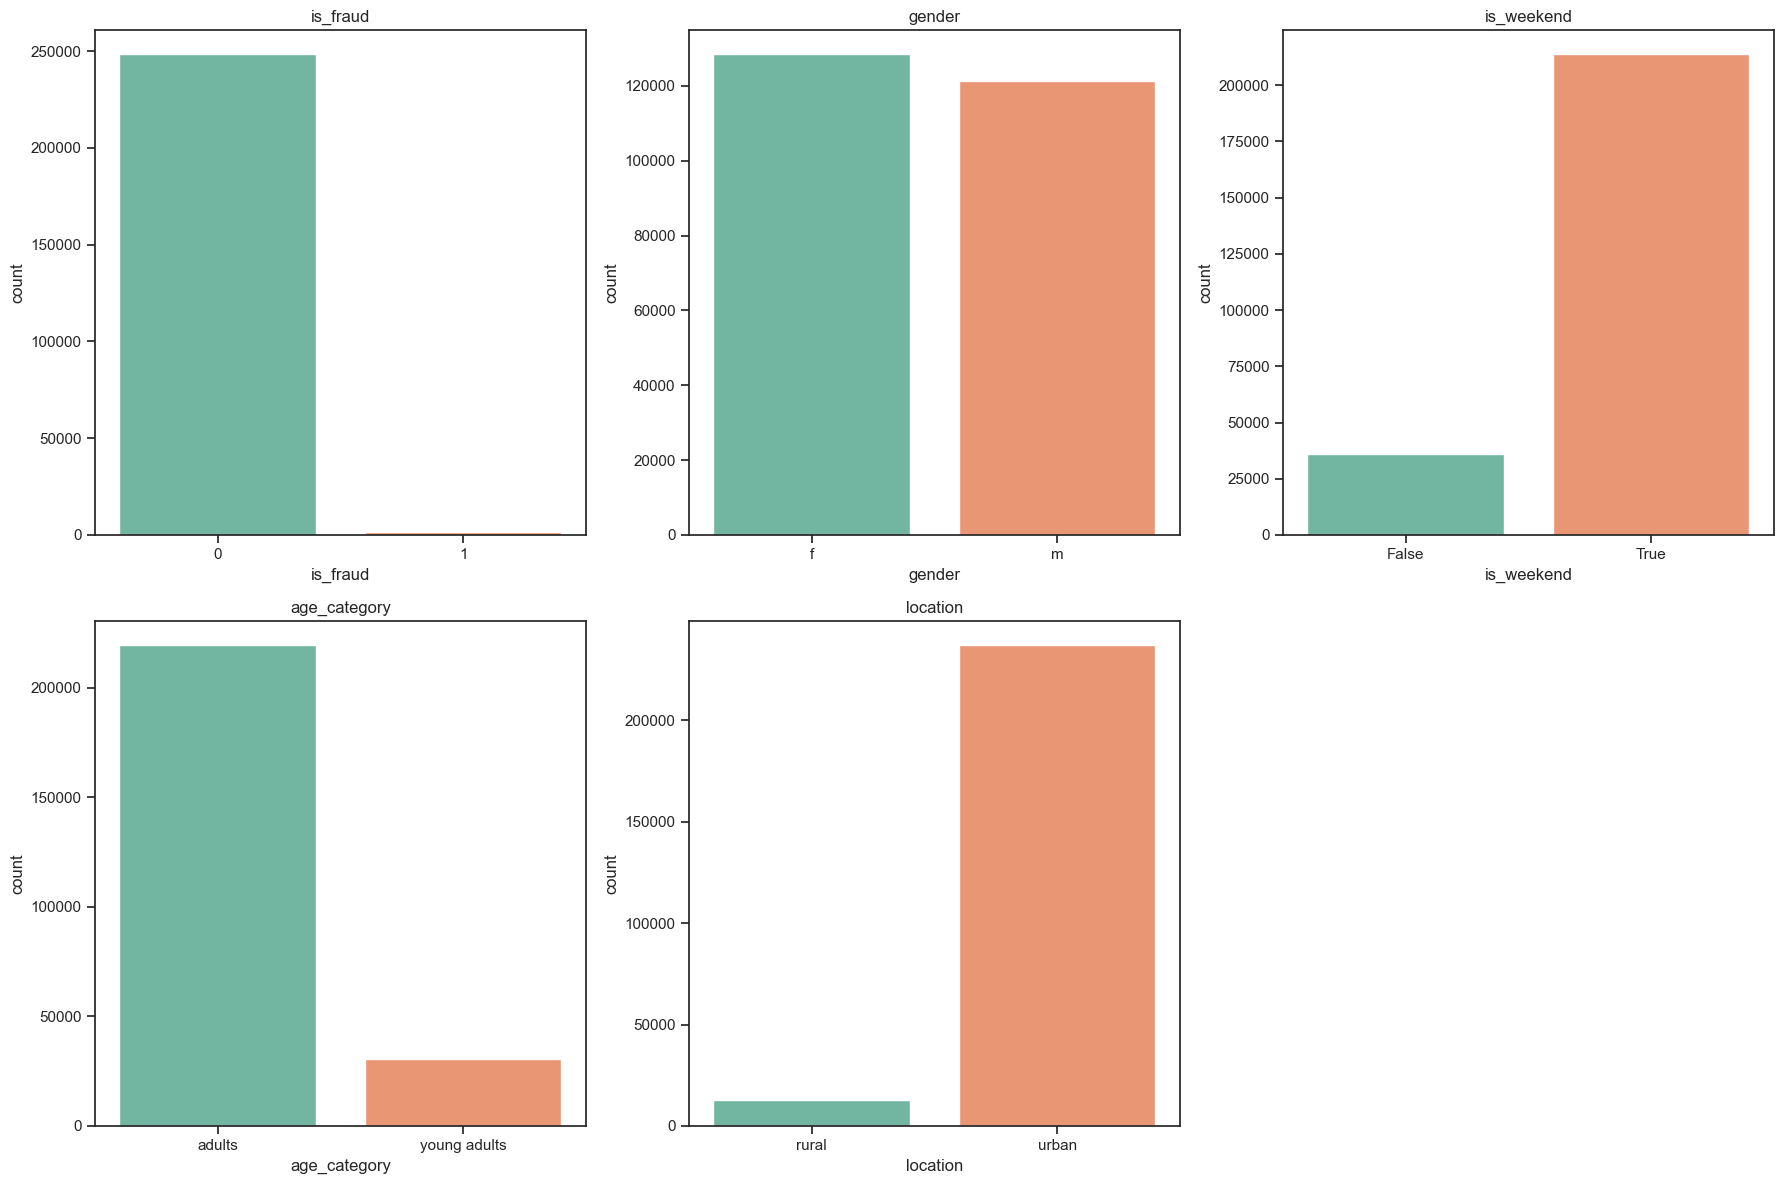

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of subplots
num_cols = len(df_dummy.columns)  
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange plots in rows of 3

plt.figure(figsize=(18, 6 * num_rows))  # Adjust figure size

for i, col in enumerate(df_dummy.columns, 1):  # Start index from 1 for subplot
    plt.subplot(num_rows, 3, i)  # Dynamic row and column adjustment
    sns.countplot(data=df_dummy, x=col, palette='Set2')
    plt.title(f'{col}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Categorial Data

In [50]:
# df_category = df_category.drop(['gender', 'is_weekend', 'is_suspicious', 'age_category', 'location', 'profile_category'], axis=1)

In [39]:
df_category.head()

gender state           profile            \
185    f     nj   young adults female urban    
186    f     nj   young adults female urban    
187    f     nj   young adults female urban    
188    f     nj   young adults female urban    
189    f     nj   young adults female urban    

                trans_num                category   day  is_weekend issuer  \
185  d551518dc69441dae803bb711b97c9ee  shopping net   9     True     Visa    
186  ec83997c27461bf8a1a989021e4df9fe  shopping net  11     True     Visa    
187  acdb36bf499af78ea13b2e8772da0d0c  shopping net  23     True     Visa    
188  0e5ec24d278b397d21675e46042778c6  shopping net  24     True     Visa    
189  c9d221acd26a21dfce4b7f79fe0dfcc2  shopping net   8     True     Visa    

    job_category  age_category location age_range time_category  
185   Scientist   young adults   urban     18-24       Evening   
186   Scientist   young adults   urban     18-24       Evening   
187   Scientist   young adults   urban     18-24     Afternoon   
188   Scientist   young adults   urban     18-24       Evening   
189   Scientist   young adults   urban     18-24     Afternoon

In [40]:
df_category = df_category.drop(['gender', 'is_weekend', 'age_category', 'location',], axis=1)

In [42]:
df_category['trans_num'].value_counts()

trans_num
0000addfb24ff48ee172d700d65d81c5    1
aa82880643b52405bf81e7c6c1ac7682    1
aa7cfb4bf0627eaa7676f313938bb69c    1
aa7d1d0f441794b18fa5d1ff3e0fc611    1
aa7d204596d5450de66851be4ea47f1c    1
                                   ..
55ee019f72253ef17fb0e225f078848d    1
55ee1d8760c7f91c3acb163ac1d8cc1b    1
55ee89aa5221860eca42089fdd0d6a7c    1
55eeac9447553baf9114e6e09e103b20    1
ffff93cd2dd2116adce54214cff6ad4a    1
Name: count, Length: 249782, dtype: int64

trans_num have a unique value in each row, drop this column

In [43]:
df_category = df_category.drop(['trans_num'], axis=1)

In [44]:
df_category

state           profile              category   day   issuer   \
185       nj   young adults female urban   shopping net   9      Visa   
186       nj   young adults female urban   shopping net  11      Visa   
187       nj   young adults female urban   shopping net  23      Visa   
188       nj   young adults female urban   shopping net  24      Visa   
189       nj   young adults female urban   shopping net   8      Visa   
...       ...                         ...           ...  ..       ...   
1364531   ny      adults 50up male urban   shopping pos  27  Discover   
1364532   ny      adults 50up male urban   shopping pos   2  Discover   
1364533   ny      adults 50up male urban   shopping pos  30  Discover   
1364534   ny      adults 50up male urban   shopping pos  27  Discover   
1364535   ny      adults 50up male urban   shopping pos  10  Discover   

        job_category age_range time_category  
185       Scientist     18-24       Evening   
186       Scientist     18-24       Evening   
187       Scientist     18-24     Afternoon   
188       Scientist     18-24       Evening   
189       Scientist     18-24     Afternoon   
...              ...       ...           ...  
1364531          IT     45-69       Morning   
1364532          IT     45-69         Night   
1364533          IT     45-69         Night   
1364534          IT     45-69       Morning   
1364535          IT     45-69         Night   

[249782 rows x 8 columns]

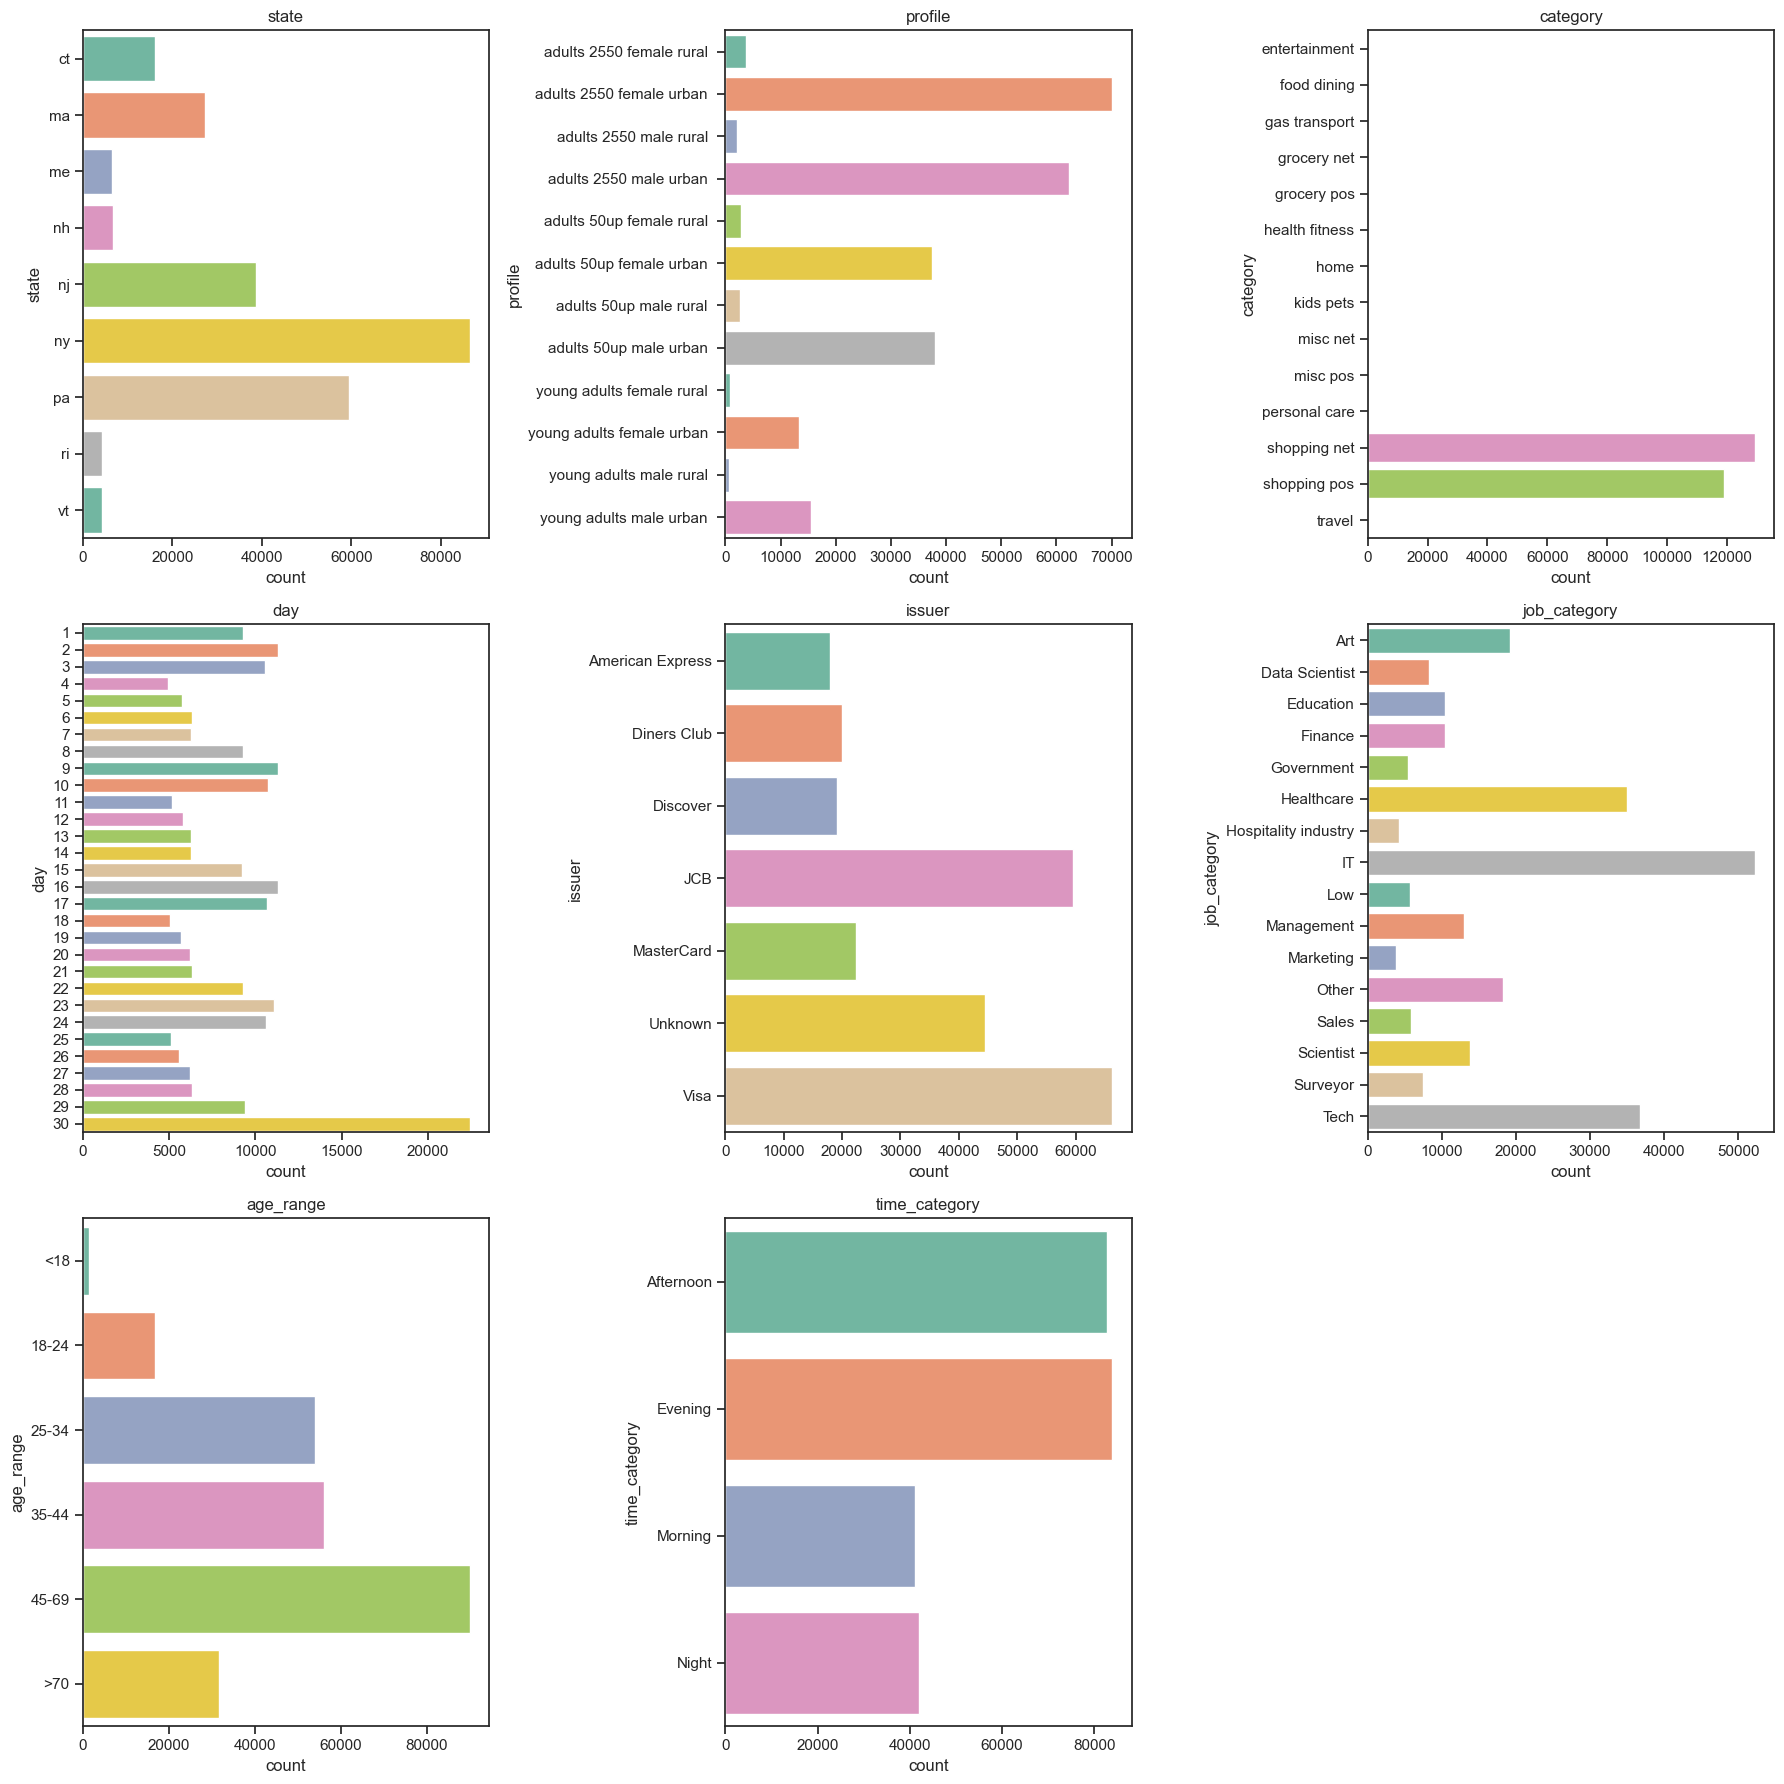

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of subplots
num_cols = len(df_category.columns)  
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Arrange plots in rows of 3

plt.figure(figsize=(18, 6 * num_rows) ) # Adjust figure size

for i, col in enumerate(df_category.columns, 1):  # Start index from 1 for subplot
    plt.subplot(num_rows, 3, i)  # Dynamic row and column adjustment
    sns.countplot(data=df_category, y=col, palette='Set2')
    plt.title(f'{col}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# Histograms for continues numbers

In [46]:
df_num = df_num.drop(['is_fraud'], axis=1)

In [47]:
# df_num=df._get_numeric_data().dropna()
df_num.shape

(249782, 10)

In [48]:
df_num

zip     lat     long    city_pop    acct_num   trans_date    amt   \
185       7005  40.9115 -74.4140    15269   826475243361 2019-11-09   81.83   
186       7005  40.9115 -74.4140    15269   826475243361 2019-11-11   68.48   
187       7005  40.9115 -74.4140    15269   826475243361 2019-11-23    9.54   
188       7005  40.9115 -74.4140    15269   826475243361 2019-11-24    2.93   
189       7005  40.9115 -74.4140    15269   826475243361 2019-11-08    1.30   
...        ...      ...      ...       ...           ...        ...     ...   
1364531  12414  42.2276 -73.8985    10510   846920444376 2019-11-27  223.34   
1364532  12414  42.2276 -73.8985    10510   846920444376 2019-11-02   53.08   
1364533  12414  42.2276 -73.8985    10510   846920444376 2019-11-30  121.28   
1364534  12414  42.2276 -73.8985    10510   846920444376 2019-11-27   66.31   
1364535  12414  42.2276 -73.8985    10510   846920444376 2019-11-10   79.09   

         merch_lat  merch_long  age  
185      41.497516  -74.258973  22   
186      40.661566  -73.849180  22   
187      41.655939  -75.234739  22   
188      40.062355  -74.923742  22   
189      41.285106  -74.645948  22   
...            ...         ...  ...  
1364531  41.833756  -74.700726  57   
1364532  41.820045  -74.555250  57   
1364533  42.991588  -73.760047  57   
1364534  42.047309  -73.327625  57   
1364535  42.359574  -74.229708  57   

[249782 rows x 10 columns]

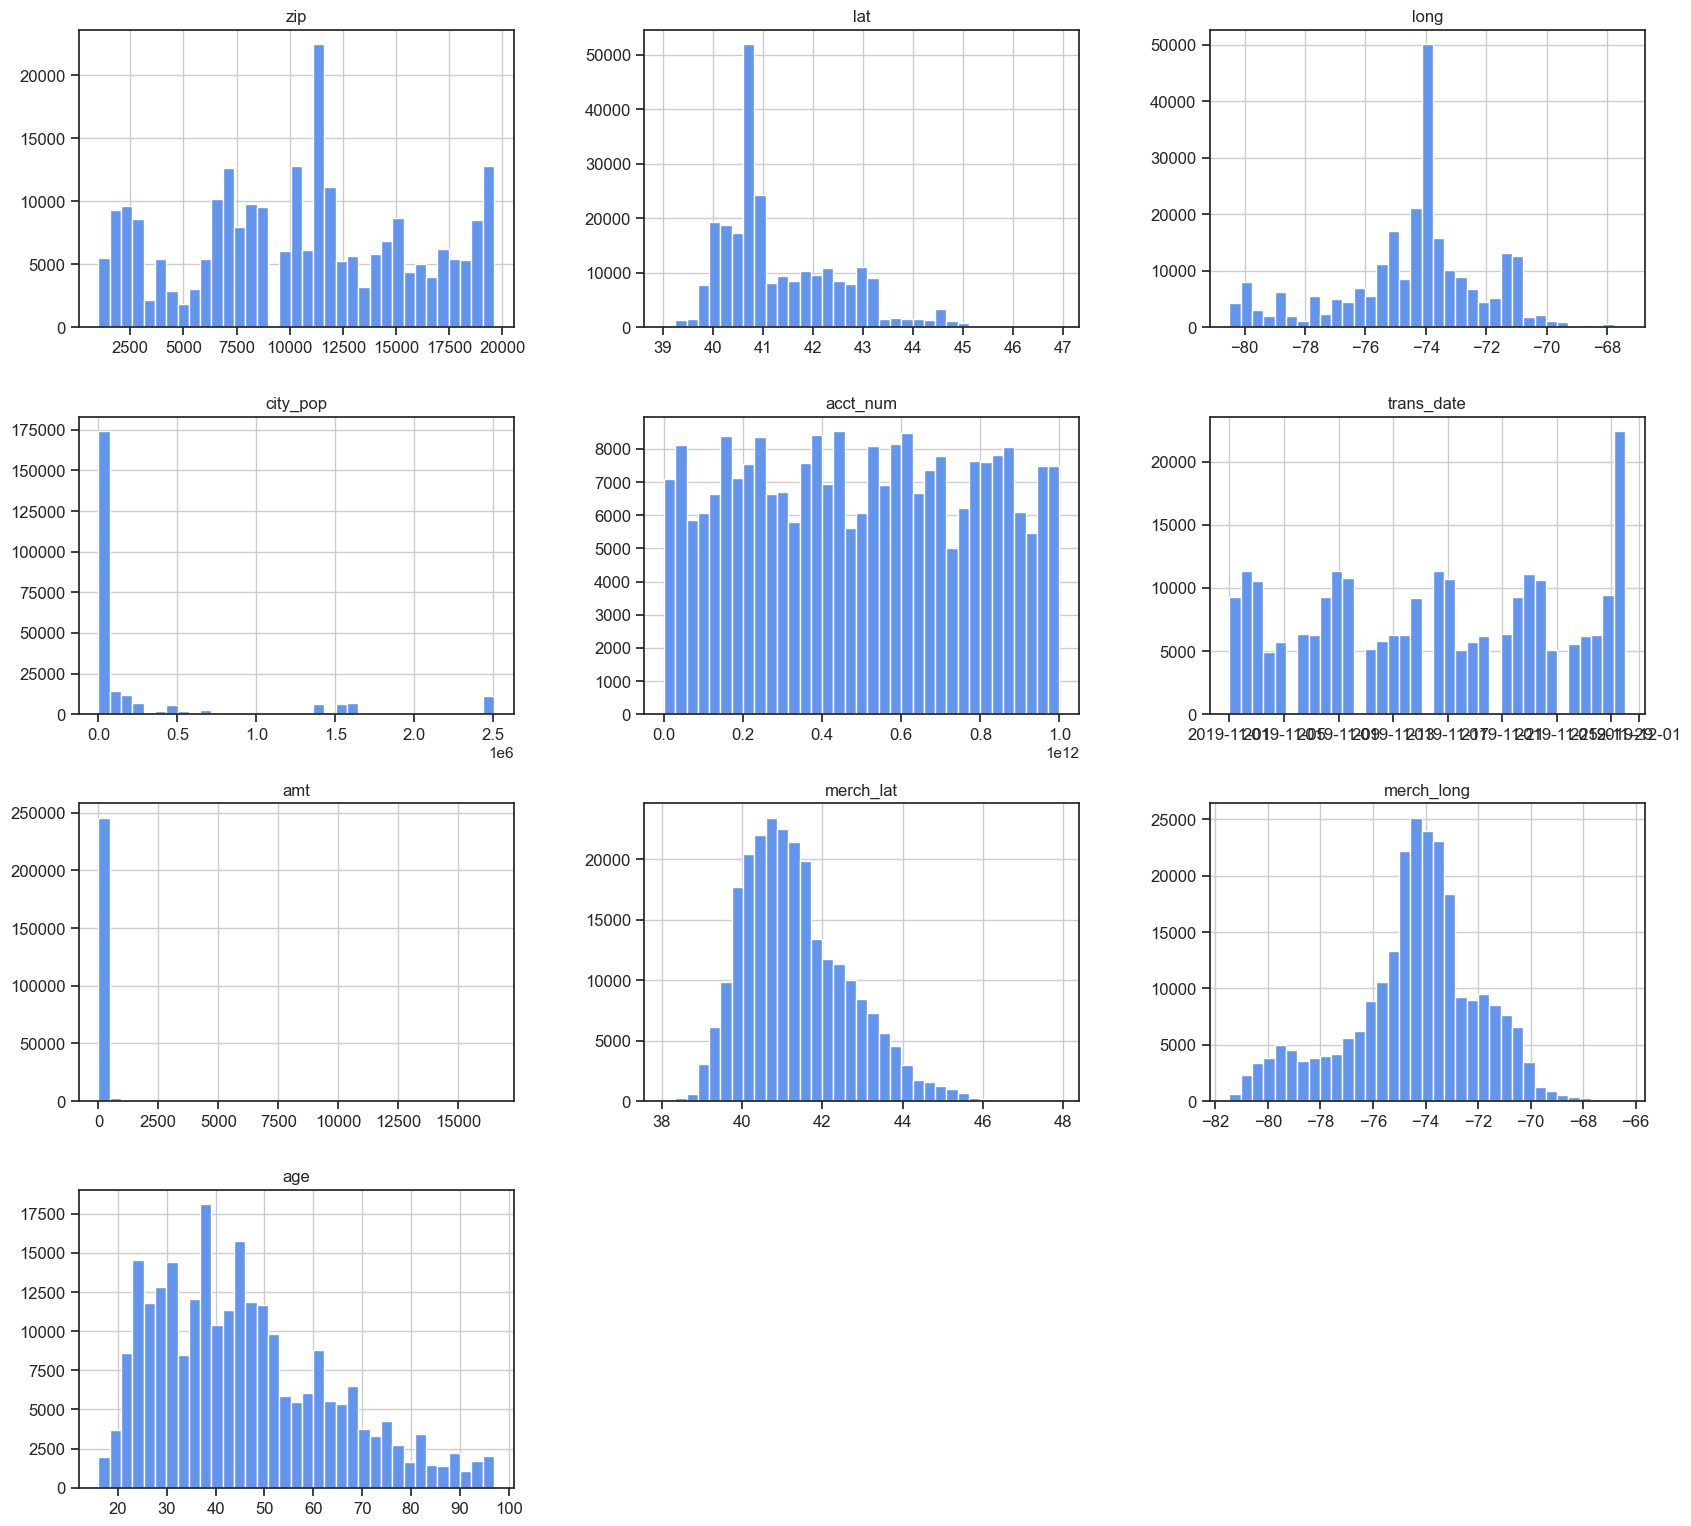

In [49]:
df_num.hist(figsize=(18, 18), bins=35, xlabelsize=12, ylabelsize=12, color = "cornflowerblue");

# Skewness

In [53]:
df_num = df_num.drop(['trans_date'], axis=1)

In [88]:
df_protocol = df_protocol.drop(['trans_date'], axis=1)

In [89]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(df_protocol.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

# Y - Target Value

<Axes: xlabel='is_fraud', ylabel='count'>

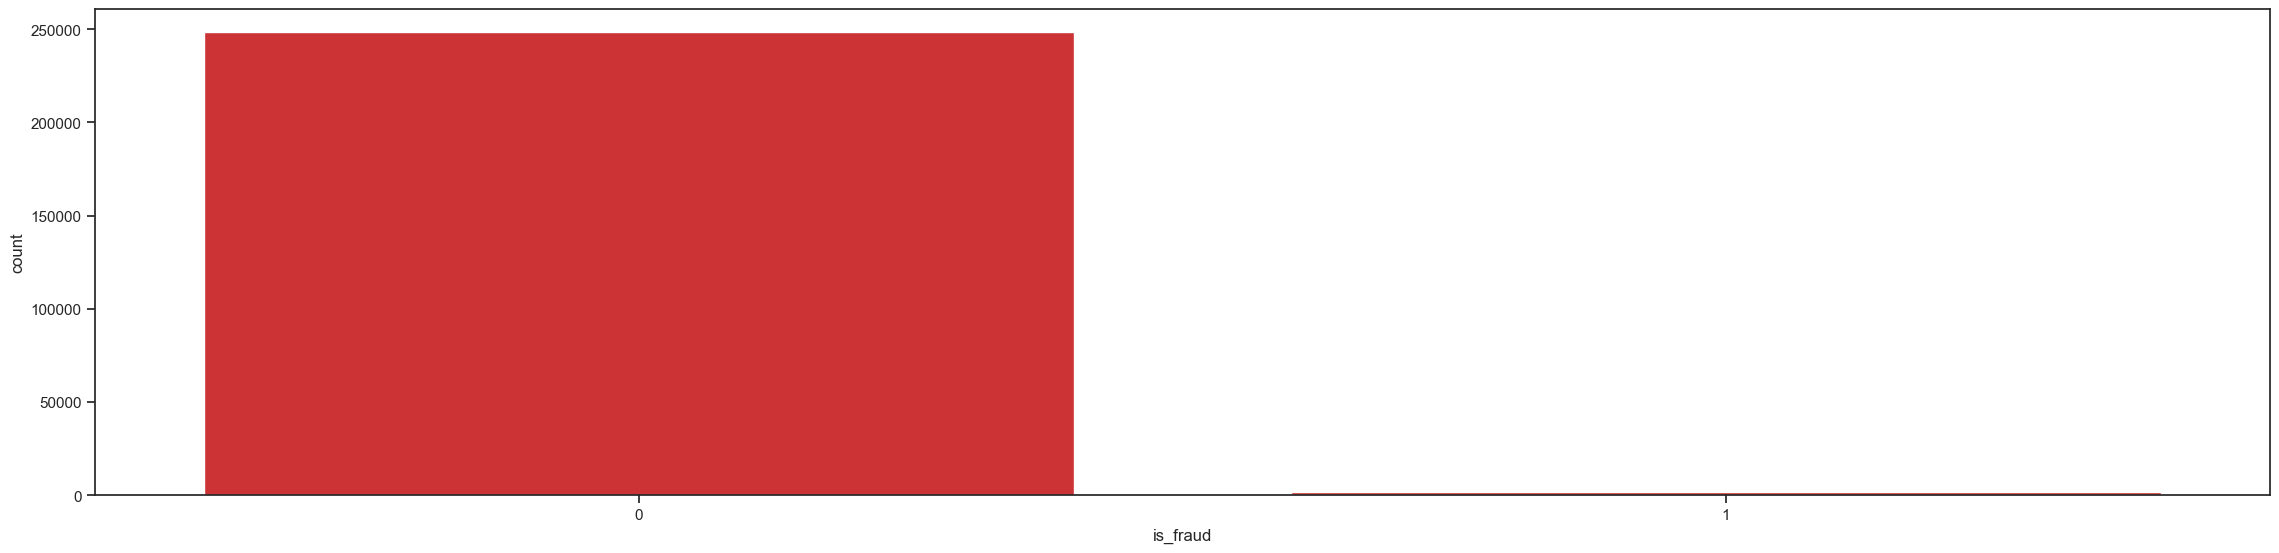

In [55]:
fig, ax=plt.subplots(figsize=(25, 6))
sns.countplot(x=df['is_fraud'].dropna(),data=df)

In [56]:
df['is_fraud'].value_counts()

is_fraud
0    248391
1      1391
Name: count, dtype: int64

# Label Encoding

In [59]:
df_protocol_copy1 = df_protocol.copy()

In [61]:
df_protocol = df_protocol.drop(['first', 'last', 'street', 'city', 'merchant', 'trans_num'], axis=1)

In [248]:
# df_protocol = df_protocol.drop(['zip', 'trans_date', 'trans_num', 'acct_num'], axis=1)

In [249]:
# df_protocol = df_protocol.drop(['profile', 'day'], axis=1)

In [62]:
df_protocol

gender  state   zip     lat     long    city_pop    acct_num    \
185         0      4     7005  40.9115 -74.4140    15269   826475243361   
186         0      4     7005  40.9115 -74.4140    15269   826475243361   
187         0      4     7005  40.9115 -74.4140    15269   826475243361   
188         0      4     7005  40.9115 -74.4140    15269   826475243361   
189         0      4     7005  40.9115 -74.4140    15269   826475243361   
...         ...    ...    ...      ...      ...       ...           ...   
1364531     1      5    12414  42.2276 -73.8985    10510   846920444376   
1364532     1      5    12414  42.2276 -73.8985    10510   846920444376   
1364533     1      5    12414  42.2276 -73.8985    10510   846920444376   
1364534     1      5    12414  42.2276 -73.8985    10510   846920444376   
1364535     1      5    12414  42.2276 -73.8985    10510   846920444376   

         profile trans_date  category    amt   is_fraud  merch_lat  \
185         9    2019-11-09     11      81.83      0     41.497516   
186         9    2019-11-11     11      68.48      0     40.661566   
187         9    2019-11-23     11       9.54      0     41.655939   
188         9    2019-11-24     11       2.93      0     40.062355   
189         9    2019-11-08     11       1.30      0     41.285106   
...          ...        ...       ...     ...       ...        ...   
1364531     7    2019-11-27     12     223.34      0     41.833756   
1364532     7    2019-11-02     12      53.08      0     41.820045   
1364533     7    2019-11-30     12     121.28      0     42.991588   
1364534     7    2019-11-27     12      66.31      0     42.047309   
1364535     7    2019-11-10     12      79.09      0     42.359574   

         merch_long  day  is_weekend  issuer  job_category  age_category  \
185      -74.258973   8       True       6         13             1        
186      -73.849180  10       True       6         13             1        
187      -75.234739  22       True       6         13             1        
188      -74.923742  23       True       6         13             1        
189      -74.645948   7       True       6         13             1        
...             ...  ...         ...     ...           ...           ...   
1364531  -74.700726  26       True       2          7             0        
1364532  -74.555250   1      False       2          7             0        
1364533  -73.760047  29       True       2          7             0        
1364534  -73.327625  26       True       2          7             0        
1364535  -74.229708   9       True       2          7             0        

         location  age  age_range  time_category  
185          1     22       0            1        
186          1     22       0            1        
187          1     22       0            0        
188          1     22       0            1        
189          1     22       0            0        
...           ...  ...        ...            ...  
1364531      1     57       3            2        
1364532      1     57       3            3        
1364533      1     57       3            3        
1364534      1     57       3            2        
1364535      1     57       3            3        

[249782 rows x 23 columns]

In [63]:
df_copy1 = df.copy

In [64]:
df = df.drop(['first', 'last', 'street', 'city', 'merchant', 'trans_num'], axis=1)

In [65]:
df

gender state   zip     lat     long    city_pop    acct_num    \
185        f     nj    7005  40.9115 -74.4140    15269   826475243361   
186        f     nj    7005  40.9115 -74.4140    15269   826475243361   
187        f     nj    7005  40.9115 -74.4140    15269   826475243361   
188        f     nj    7005  40.9115 -74.4140    15269   826475243361   
189        f     nj    7005  40.9115 -74.4140    15269   826475243361   
...        ...   ...    ...      ...      ...       ...           ...   
1364531    m     ny   12414  42.2276 -73.8985    10510   846920444376   
1364532    m     ny   12414  42.2276 -73.8985    10510   846920444376   
1364533    m     ny   12414  42.2276 -73.8985    10510   846920444376   
1364534    m     ny   12414  42.2276 -73.8985    10510   846920444376   
1364535    m     ny   12414  42.2276 -73.8985    10510   846920444376   

                  profile           trans_date    category      amt   \
185      young adults female urban  2019-11-09  shopping net   81.83   
186      young adults female urban  2019-11-11  shopping net   68.48   
187      young adults female urban  2019-11-23  shopping net    9.54   
188      young adults female urban  2019-11-24  shopping net    2.93   
189      young adults female urban  2019-11-08  shopping net    1.30   
...                             ...        ...           ...     ...   
1364531     adults 50up male urban  2019-11-27  shopping pos  223.34   
1364532     adults 50up male urban  2019-11-02  shopping pos   53.08   
1364533     adults 50up male urban  2019-11-30  shopping pos  121.28   
1364534     adults 50up male urban  2019-11-27  shopping pos   66.31   
1364535     adults 50up male urban  2019-11-10  shopping pos   79.09   

         is_fraud  merch_lat  merch_long day  is_weekend   issuer   \
185          0     41.497516  -74.258973   9      True        Visa   
186          0     40.661566  -73.849180  11      True        Visa   
187          0     41.655939  -75.234739  23      True        Visa   
188          0     40.062355  -74.923742  24      True        Visa   
189          0     41.285106  -74.645948   8      True        Visa   
...           ...        ...         ...  ..         ...       ...   
1364531      0     41.833756  -74.700726  27      True    Discover   
1364532      0     41.820045  -74.555250   2     False    Discover   
1364533      0     42.991588  -73.760047  30      True    Discover   
1364534      0     42.047309  -73.327625  27      True    Discover   
1364535      0     42.359574  -74.229708  10      True    Discover   

        job_category  age_category location  age age_range time_category  
185       Scientist   young adults   urban   22     18-24       Evening   
186       Scientist   young adults   urban   22     18-24       Evening   
187       Scientist   young adults   urban   22     18-24     Afternoon   
188       Scientist   young adults   urban   22     18-24       Evening   
189       Scientist   young adults   urban   22     18-24     Afternoon   
...              ...           ...      ...  ...       ...           ...  
1364531          IT         adults   urban   57     45-69       Morning   
1364532          IT         adults   urban   57     45-69         Night   
1364533          IT         adults   urban   57     45-69         Night   
1364534          IT         adults   urban   57     45-69       Morning   
1364535          IT         adults   urban   57     45-69         Night   

[249782 rows x 23 columns]

In [67]:
import pickle
with open('EDA_fruad.pkl', 'wb') as f:
    pickle.dump(df, f)

print("EDA_fruad saved as a pickle file.")

EDA_fruad saved as a pickle file.


In [68]:
with open('EDA_fruad_protocol.pkl', 'wb') as f:
    pickle.dump(df_protocol, f)

print("EDA_fruad_protocol saved as a pickle file.")

EDA_fruad_protocol saved as a pickle file.


# Correlation

In [69]:
df_protocol.corr(method='spearman')

gender     state      zip       lat      long    city_pop  \
gender         1.000000 -0.025117 -0.002740 -0.014721  0.001945  0.010550   
state         -0.025117  1.000000  0.797168 -0.355262 -0.632696  0.005918   
zip           -0.002740  0.797168  1.000000 -0.450588 -0.804942  0.034182   
lat           -0.014721 -0.355262 -0.450588  1.000000  0.461892 -0.219672   
long           0.001945 -0.632696 -0.804942  0.461892  1.000000  0.001578   
city_pop       0.010550  0.005918  0.034182 -0.219672  0.001578  1.000000   
acct_num       0.037088 -0.017085 -0.011021  0.013038  0.008711 -0.007799   
profile        0.420298 -0.011417  0.024979 -0.021343 -0.017638  0.026430   
trans_date     0.000695  0.000029 -0.000880 -0.000914 -0.000751 -0.002572   
category      -0.287602  0.009483  0.011327 -0.045152 -0.024951  0.058328   
amt           -0.089837  0.009775  0.005496  0.000766 -0.011527 -0.010988   
is_fraud       0.003995  0.010317  0.008357  0.009240 -0.006459 -0.000177   
merch_lat     -0.006831 -0.293539 -0.379898  0.849054  0.378680 -0.204672   
merch_long     0.008216 -0.622861 -0.791992  0.420265  0.943709  0.001787   
day            0.000695  0.000029 -0.000880 -0.000914 -0.000751 -0.002572   
is_weekend     0.001530  0.000375 -0.001462  0.001874 -0.000634 -0.004228   
issuer        -0.041615 -0.057188 -0.034743  0.007551  0.027355 -0.014598   
job_category   0.025057 -0.004767  0.001713 -0.017361  0.000932  0.022471   
age_category   0.035503 -0.008160  0.010618  0.020507  0.005044  0.000280   
location       0.029912 -0.119472 -0.045393 -0.135092  0.058678  0.383545   
age           -0.013658  0.023262  0.028892 -0.017725 -0.043624 -0.028052   
age_range     -0.021277  0.026925  0.033912 -0.017861 -0.045535 -0.032588   
time_category  0.032873  0.028281  0.028724 -0.015321 -0.039356 -0.037742   

               acct_num   profile  trans_date  category     amt    is_fraud  \
gender         0.037088  0.420298   0.000695  -0.287602 -0.089837  0.003995   
state         -0.017085 -0.011417   0.000029   0.009483  0.009775  0.010317   
zip           -0.011021  0.024979  -0.000880   0.011327  0.005496  0.008357   
lat            0.013038 -0.021343  -0.000914  -0.045152  0.000766  0.009240   
long           0.008711 -0.017638  -0.000751  -0.024951 -0.011527 -0.006459   
city_pop      -0.007799  0.026430  -0.002572   0.058328 -0.010988 -0.000177   
acct_num       1.000000 -0.003029  -0.000431  -0.010953 -0.002695 -0.002682   
profile       -0.003029  1.000000   0.004104   0.047757 -0.082163  0.017565   
trans_date    -0.000431  0.004104   1.000000   0.236217 -0.002173 -0.013578   
category      -0.010953  0.047757   0.236217   1.000000  0.127616 -0.100557   
amt           -0.002695 -0.082163  -0.002173   0.127616  1.000000  0.089674   
is_fraud      -0.002682  0.017565  -0.013578  -0.100557  0.089674  1.000000   
merch_lat      0.013047 -0.017134   0.000857  -0.049312  0.000087  0.006429   
merch_long     0.009886 -0.012772  -0.000274  -0.026293 -0.013113 -0.006169   
day           -0.000431  0.004104   1.000000   0.236217 -0.002173 -0.013578   
is_weekend    -0.000035 -0.008233   0.609211   0.140040  0.000885  0.009910   
issuer        -0.021017 -0.041526   0.001332   0.021571  0.005818 -0.017526   
job_category  -0.010674 -0.020148  -0.002457  -0.048505 -0.011841 -0.005741   
age_category  -0.006201  0.579661   0.007761  -0.357480 -0.123655  0.000260   
location      -0.005755  0.057806   0.001528   0.152294 -0.030227  0.000952   
age           -0.009151  0.147657  -0.004492   0.579463  0.100429  0.010116   
age_range     -0.016151  0.123146  -0.003764   0.510957  0.088331  0.007298   
time_category -0.007951  0.434323  -0.004222   0.535367  0.078725  0.040466   

               merch_lat  merch_long     day    is_weekend   issuer   \
gender        -0.006831    0.008216   0.000695   0.001530  -0.041615   
state         -0.293539   -0.622861   0.000029   0.000375  -0.057188   
zip           -0.379898   -0.791992  -0.000880  -0.001

<Axes: >

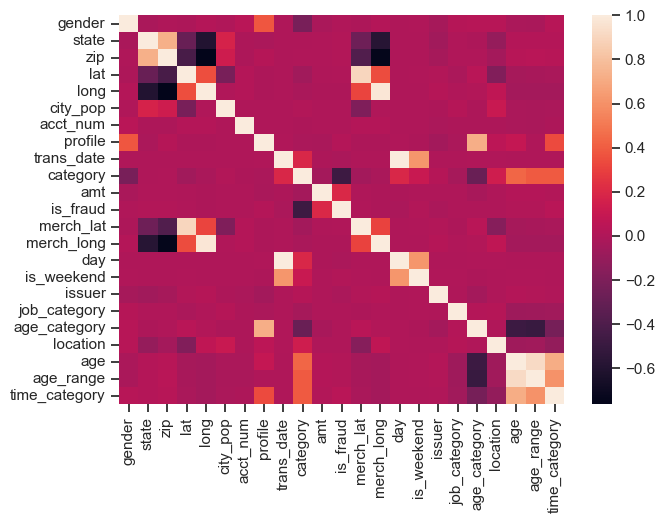

In [70]:
sns.heatmap(df_protocol.corr())

The color intensity at the intersection of two variables indicates the strength and direction of their correlation.

Overall, the heatmap highlights that temporal and geographic variables are closely related within their respective groups, but most other variable pairs (e.g., demographic with transactional) show minimal correlation, which could impact feature selection for tasks like fraud detection.

In [71]:
# Compute the correlation matrix
numeric_corr_matrix = df_num.corr()

# Display the correlation matrix
print(numeric_corr_matrix)

               zip       lat      long    city_pop  acct_num     amt    \
zip         1.000000 -0.429390 -0.763570  0.130083 -0.009686  0.004120   
lat        -0.429390  1.000000  0.350616 -0.221185  0.021083 -0.001712   
long       -0.763570  0.350616  1.000000  0.002725  0.015330 -0.006544   
city_pop    0.130083 -0.221185  0.002725  1.000000 -0.002986 -0.001125   
acct_num   -0.009686  0.021083  0.015330 -0.002986  1.000000 -0.005057   
amt         0.004120 -0.001712 -0.006544 -0.001125 -0.005057  1.000000   
merch_lat  -0.386518  0.899434  0.315212 -0.198496  0.019622 -0.001270   
merch_long -0.743125  0.341551  0.972743  0.002475  0.015864 -0.007053   
age         0.030354 -0.035961 -0.043577 -0.019519 -0.012762  0.019673   

            merch_lat  merch_long     age    
zip        -0.386518   -0.743125   0.030354  
lat         0.899434    0.341551  -0.035961  
long        0.315212    0.972743  -0.043577  
city_pop   -0.198496    0.002475  -0.019519  
acct_num    0.019622    0.015

<Axes: >

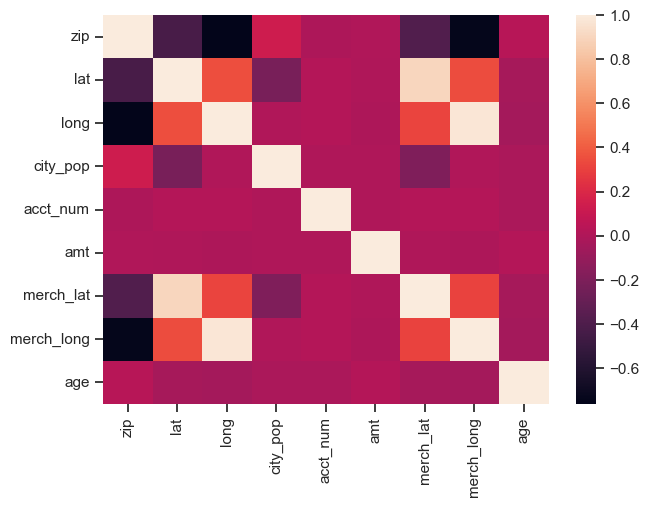

In [72]:
sb.heatmap(numeric_corr_matrix)

# t-test

The T-test compares the mean day of the month for transactions in the is_fraud and no_fraud groups to determine if there’s a statistically significant difference.

In [74]:
import scipy.stats as stats
import seaborn as sns

T-statistic: -6.7013135055883275
P-value: 2.069900753506929e-11


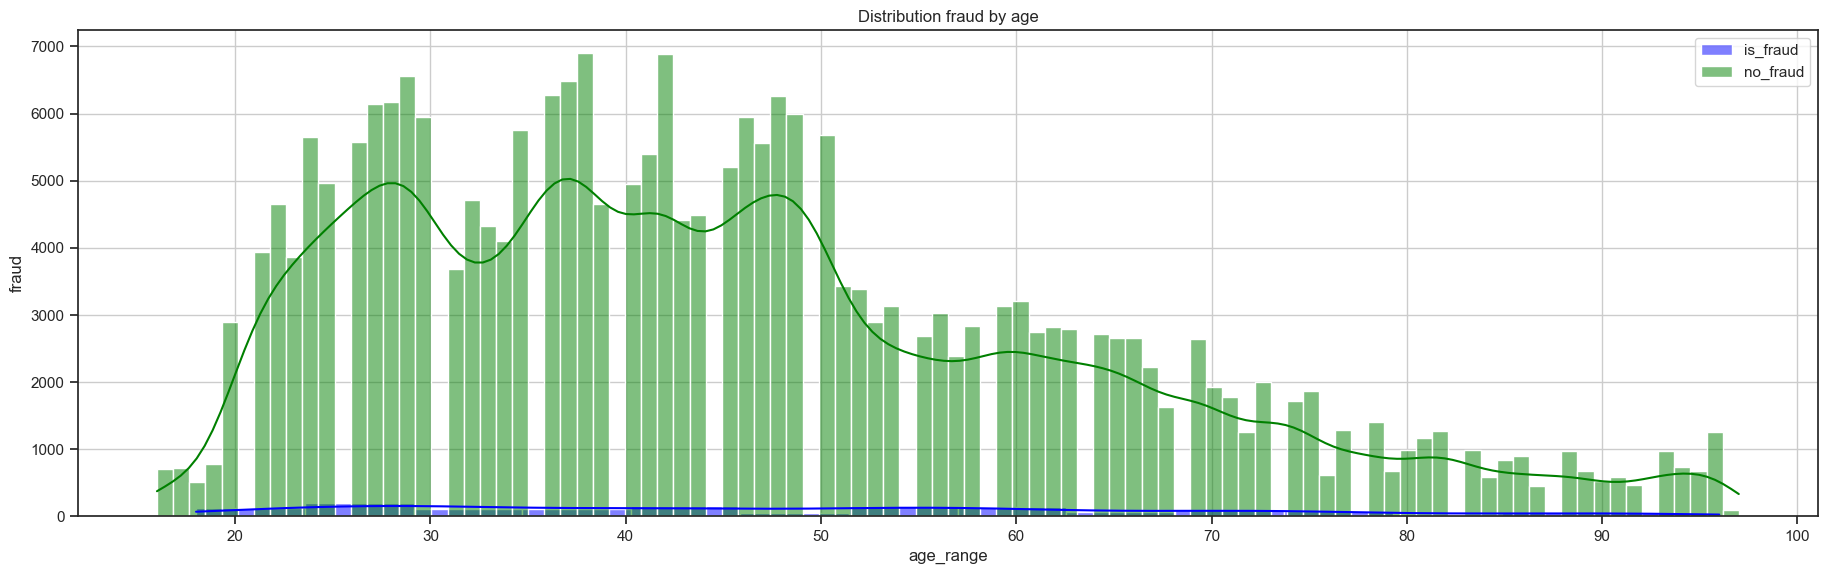

In [75]:
#Separate the consumption data by weekends and weekdays
no_fraud = df[df['is_fraud'] == 0]['age']
is_fraud = df[df['is_fraud'] == 1]['age']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(no_fraud, is_fraud)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of water consumption for weekends and weekdays
plt.figure(figsize=(20, 6))
sns.histplot(is_fraud, kde=True, color='blue', label='is_fraud', alpha=0.5)
sns.histplot(no_fraud, kde=True, color='green', label='no_fraud', alpha=0.5)
plt.title('Distribution fraud by age')
plt.xlabel('age_range')
plt.ylabel('fraud')
plt.legend()
plt.grid(True)
plt.show()

#### Observations:

The no_fraud group (green line) has a broader distribution, with a peak around age 40–50, indicating that non-fraudulent transactions are more common in this age range.
The is_fraud group (purple line) is much smaller in frequency (as expected, since fraud is typically less common) and appears to have a slightly different distribution, with peaks at slightly younger ages (around 30–40) and a smaller peak at older ages (around 70–80).
The overall age distribution (histogram) is right-skewed, with most transactions occurring for individuals aged 20–60, and fewer transactions as age increases beyond 60.

#### T-Test Results:

Statistical Significance: The very low P-value (1.95e-11) confirms that there is a statistically significant difference in the average age of individuals involved in fraudulent versus non-fraudulent transactions.
Practical Insight: The negative T-statistic suggests that fraudulent transactions tend to involve younger individuals on average compared to non-fraudulent transactions. This aligns with the plots, where the is_fraud group shows more density at younger ages.
Fraud Patterns: The results imply that age might be a useful feature for fraud detection models, as younger individuals appear more associated with fraudulent transactions in this dataset.

T-statistic: -1.996874908306544
P-value: 0.045839856691322095


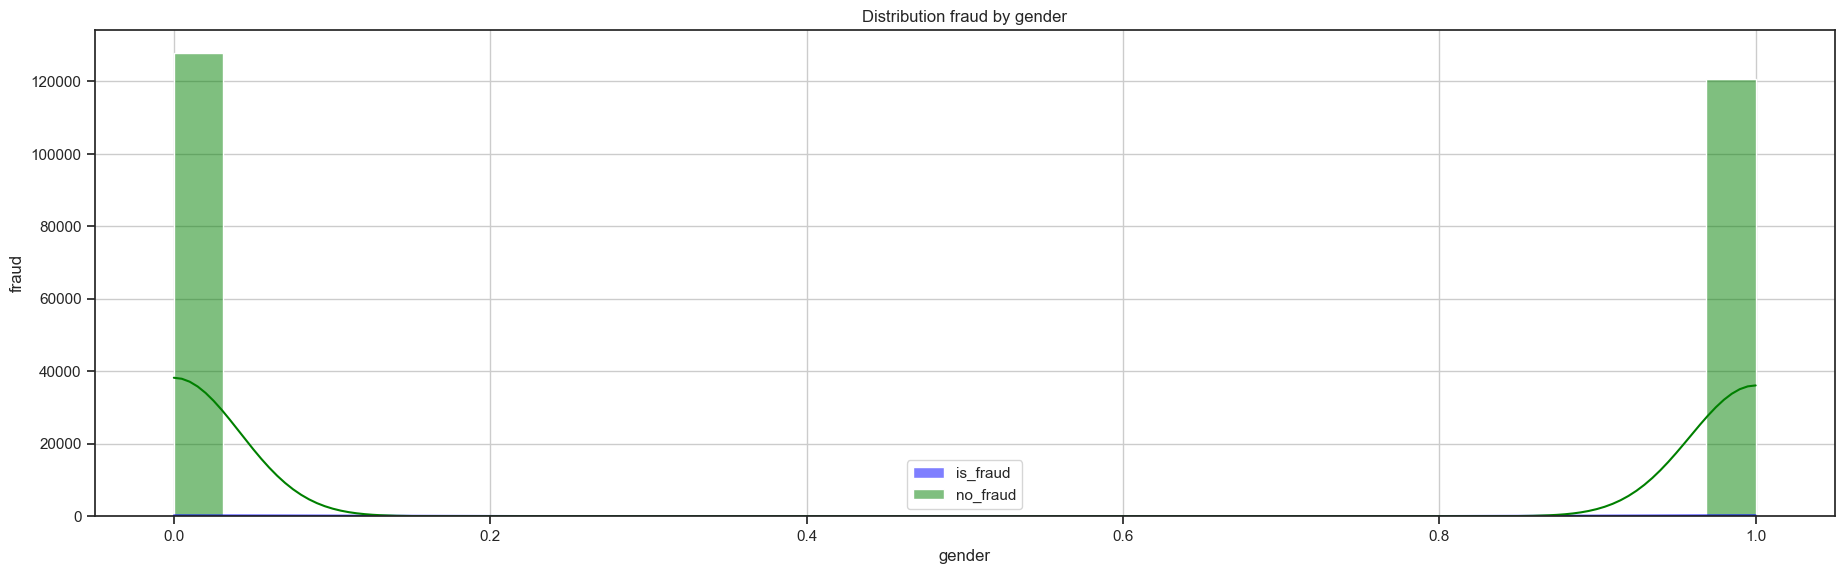

In [94]:
#Separate the consumption data by weekends and weekdays
no_fraud = df_protocol[df_protocol['is_fraud'] == 0]['gender']
is_fraud = df_protocol[df_protocol['is_fraud'] == 1]['gender']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(no_fraud, is_fraud)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of water consumption for weekends and weekdays
plt.figure(figsize=(20, 6))
sns.histplot(is_fraud, kde=True, color='blue', label='is_fraud', alpha=0.5)
sns.histplot(no_fraud, kde=True, color='green', label='no_fraud', alpha=0.5)
plt.title('Distribution fraud by gender')
plt.xlabel('gender')
plt.ylabel('fraud')
plt.legend()
plt.grid(True)
plt.show()

#### T-Test Results:

Statistical Significance: The P-value of 0.0458 indicates a statistically significant difference in the average gender representation between fraudulent and non-fraudulent transactions. This is a borderline result, it might not be considered significant.
Practical Insight: The negative T-statistic suggests that fraudulent transactions might be slightly more associated with one gender (the group encoded as 0) compared to non-fraudulent transactions. However, the small magnitude of the T-statistic and the visual similarity in plots imply that the difference is not substantial.

T-statistic: -20.473307431998606
P-value: 4.44356820043412e-93


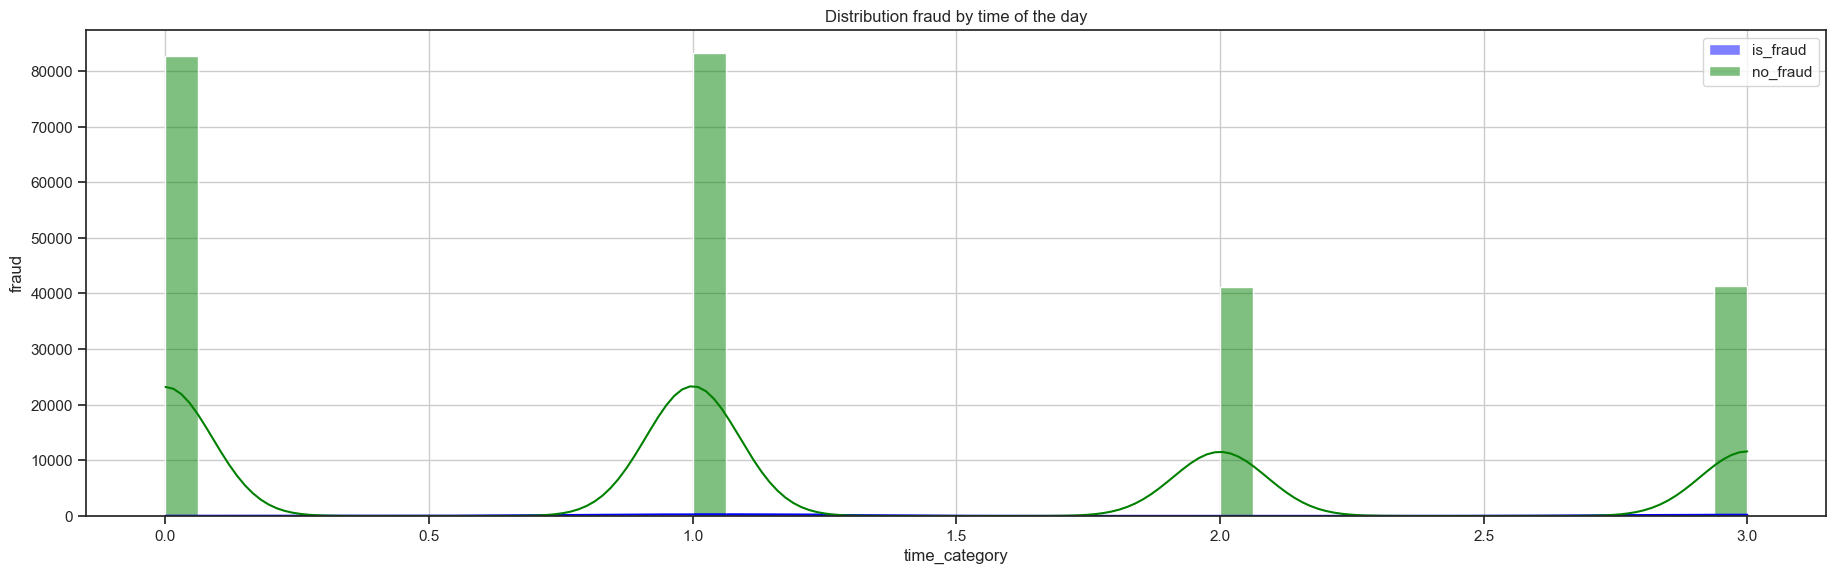

In [96]:
#Separate the consumption data by weekends and weekdays
no_fraud = df_protocol[df_protocol['is_fraud'] == 0]['time_category']
is_fraud = df_protocol[df_protocol['is_fraud'] == 1]['time_category']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(no_fraud, is_fraud)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of water consumption for weekends and weekdays
plt.figure(figsize=(20, 6))
sns.histplot(is_fraud, kde=True, color='blue', label='is_fraud', alpha=0.5)
sns.histplot(no_fraud, kde=True, color='green', label='no_fraud', alpha=0.5)
plt.title('Distribution fraud by time of the day')
plt.xlabel('time_category')
plt.ylabel('fraud')
plt.legend()
plt.grid(True)
plt.show()

0 = Afternoon
1 = Evening
2 = Morning
3 = Night

#### Observations:

The histogram indicates that transactions are not evenly distributed throughout the day. There are distinct peaks:
Around midnight (0–1 hour),
Mid-morning to noon (10–12 hours),
Early evening (18–20 hours),
Late evening (22–24 hours).
The no_fraud group (green line) closely follows the overall histogram, suggesting that non-fraudulent transactions dominate the dataset and are responsible for these peaks.
The is_fraud group (purple line) shows a different pattern, with higher density around midnight (0–1 hour) and late evening (22–24 hours), but lower density during the mid-morning and early evening peaks seen in the no_fraud group.

#### T-Test Results:

Statistical Significance: The extremely low P-value (4.44e-93) confirms a highly significant difference in the average time of day for fraudulent versus non-fraudulent transactions. This is one of the strongest statistical significances in the analyses provided so far.
Practical Insight: The negative T-statistic suggests that fraudulent transactions tend to occur earlier in the day (or potentially late at night, depending on how the 24-hour cycle is interpreted) compared to non-fraudulent transactions. The plots support this, showing that fraud peaks around midnight and late evening, while non-fraudulent transactions have more activity during mid-morning and early evening.
Fraud Patterns: This result suggests that the time of day is a critical factor in fraud detection. Fraudulent transactions are more likely to occur during off-peak hours (midnight or late evening), possibly because fraudsters target times with less oversight or activity.

T-statistic: 6.730471190764373
P-value: 1.694774012518062e-11


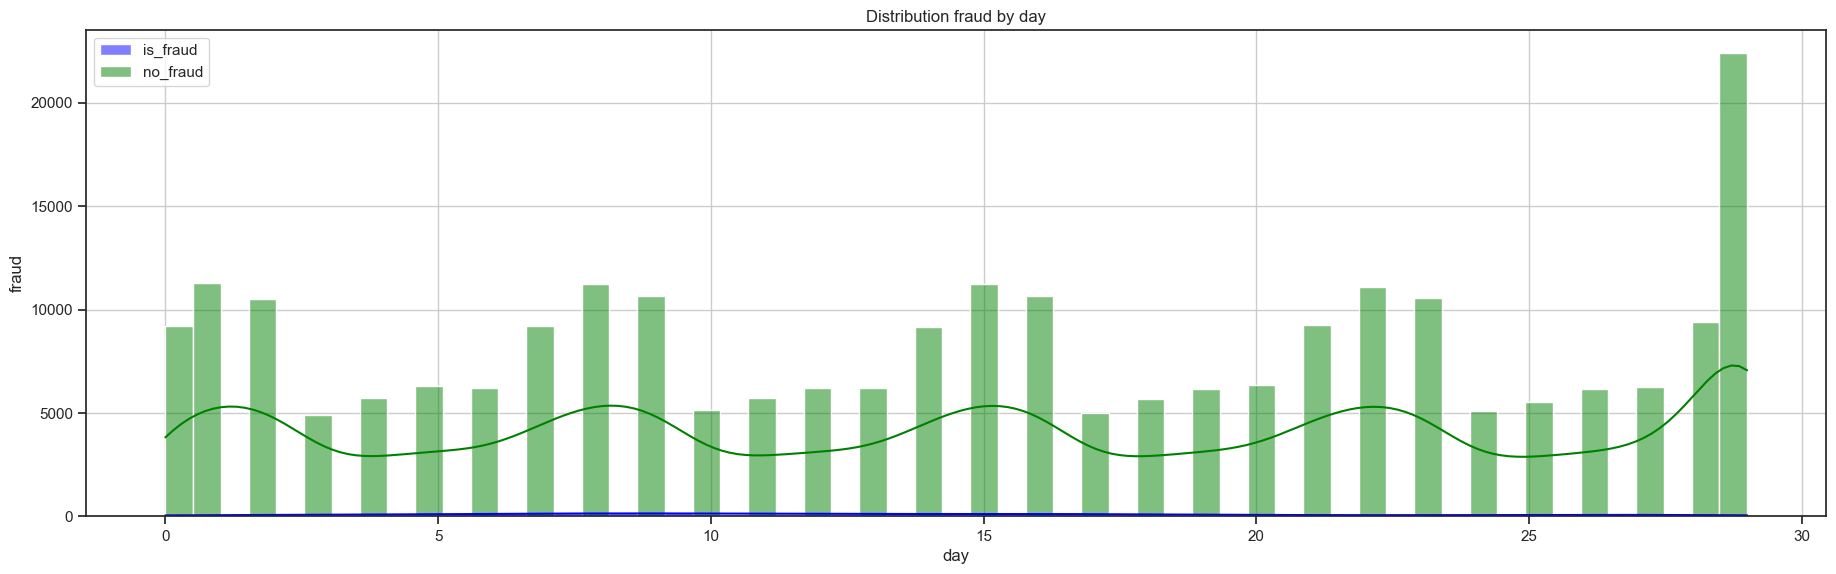

In [108]:
#Separate the consumption data by weekends and weekdays
no_fraud = df_protocol[df_protocol['is_fraud'] == 0]['day']
is_fraud = df_protocol[df_protocol['is_fraud'] == 1]['day']
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(no_fraud, is_fraud)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Plotting the distribution of water consumption for weekends and weekdays
plt.figure(figsize=(20, 6))
sns.histplot(is_fraud, kde=True, color='blue', label='is_fraud', alpha=0.5)
sns.histplot(no_fraud, kde=True, color='green', label='no_fraud', alpha=0.5)
plt.title('Distribution fraud by day')
plt.xlabel('day')
plt.ylabel('fraud')
plt.legend()
plt.grid(True)
plt.show()

#### Observations:

The histogram indicates that transaction counts are relatively consistent across most days (around 5,000 to 10,000 transactions), with a significant spike at day 31 (approaching 20,000 transactions).
The no_fraud group (green line) follows the overall histogram closely, suggesting that non-fraudulent transactions dominate the dataset and drive the peak at day 31.
The is_fraud group (purple line) shows a flatter distribution with a slight increase toward the end of the month, but the peak at day 31 is less pronounced for fraud compared to non-fraud cases.

#### T-Test Results:

Statistical Significance: The extremely low P-value (1.69e-11) confirms a highly significant difference in the average day of the month for fraudulent versus non-fraudulent transactions. This is a strong statistical result.
Practical Insight: The positive T-statistic suggests that fraudulent transactions tend to occur later in the month (toward the end, including day 31) compared to non-fraudulent transactions. The plot supports this, showing a slight upward trend for is_fraud toward the end of the month, though the day 31 peak is driven more by no_fraud.
Fraud Patterns: This result indicates that the day of the month is a relevant factor in fraud detection. Fraudulent transactions may be more common toward the end of the month, possibly due to financial pressures, end-of-cycle activities, or changes in consumer behavior.

# Data Cleansing

# Missing Data

In [110]:
df.isnull().head()

gender  state   zip    lat   long   city_pop  acct_num  profile  \
185   False  False  False  False  False    False     False    False    
186   False  False  False  False  False    False     False    False    
187   False  False  False  False  False    False     False    False    
188   False  False  False  False  False    False     False    False    
189   False  False  False  False  False    False     False    False    

     trans_date  category   amt   is_fraud  merch_lat  merch_long   day   \
185     False      False   False    False     False       False    False   
186     False      False   False    False     False       False    False   
187     False      False   False    False     False       False    False   
188     False      False   False    False     False       False    False   
189     False      False   False    False     False       False    False   

     is_weekend  issuer  job_category  age_category  location   age   \
185     False     False      False         False       False   False   
186     False     False      False         False       False   False   
187     False     False      False         False       False   False   
188     False     False      False         False       False   False   
189     False     False      False         False       False   False   

     age_range  time_category  
185    False        False      
186    False        False      
187    False        False      
188    False        False      
189    False        False

<Axes: >

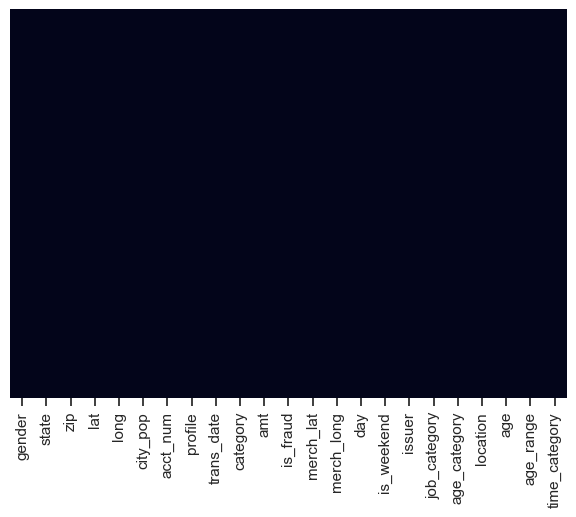

In [111]:
sb.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [251]:
# pip install --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org missingno

<Axes: >

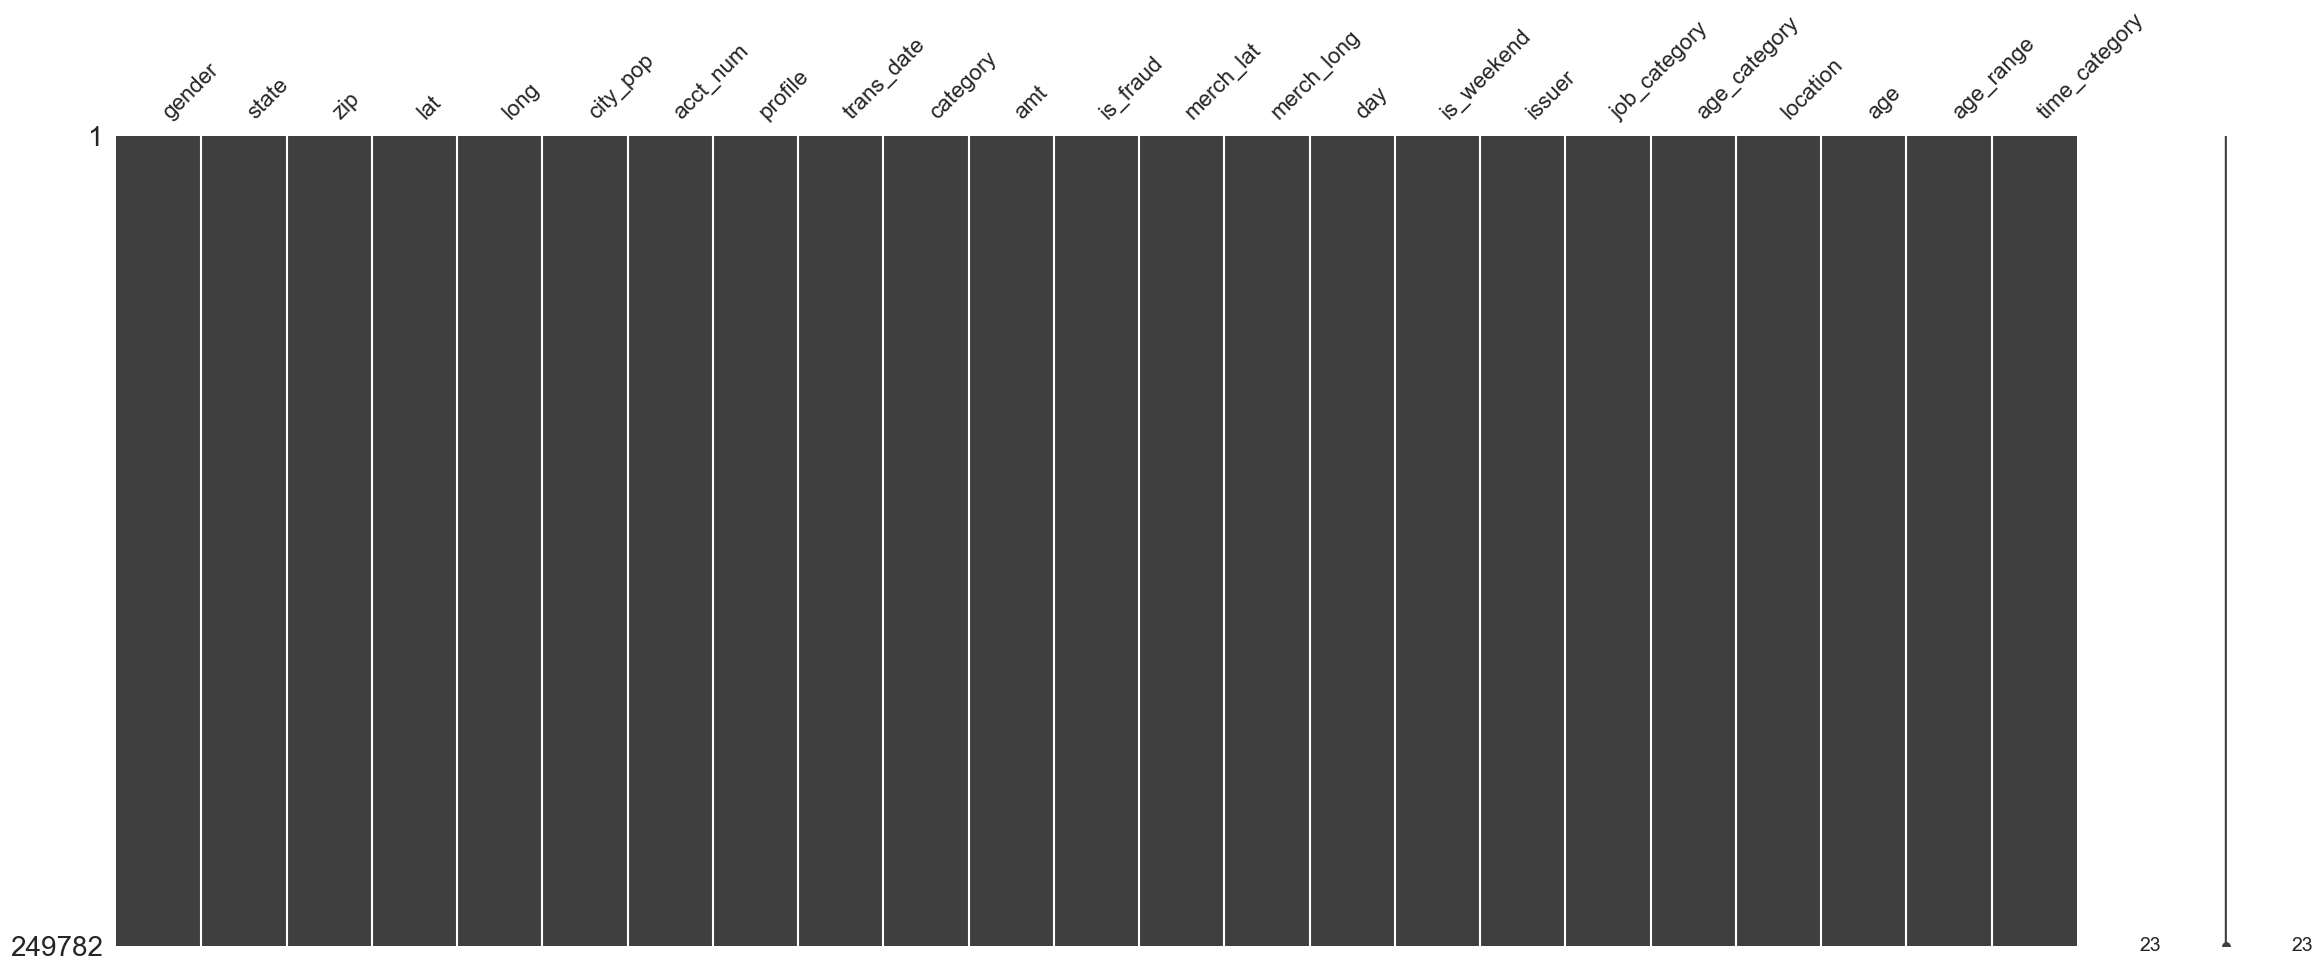

In [112]:
#missing value matrix by missingno libarary
# !pip install missingno
import missingno as msno
msno.matrix(df)

# Outliers

In [114]:
# df_num

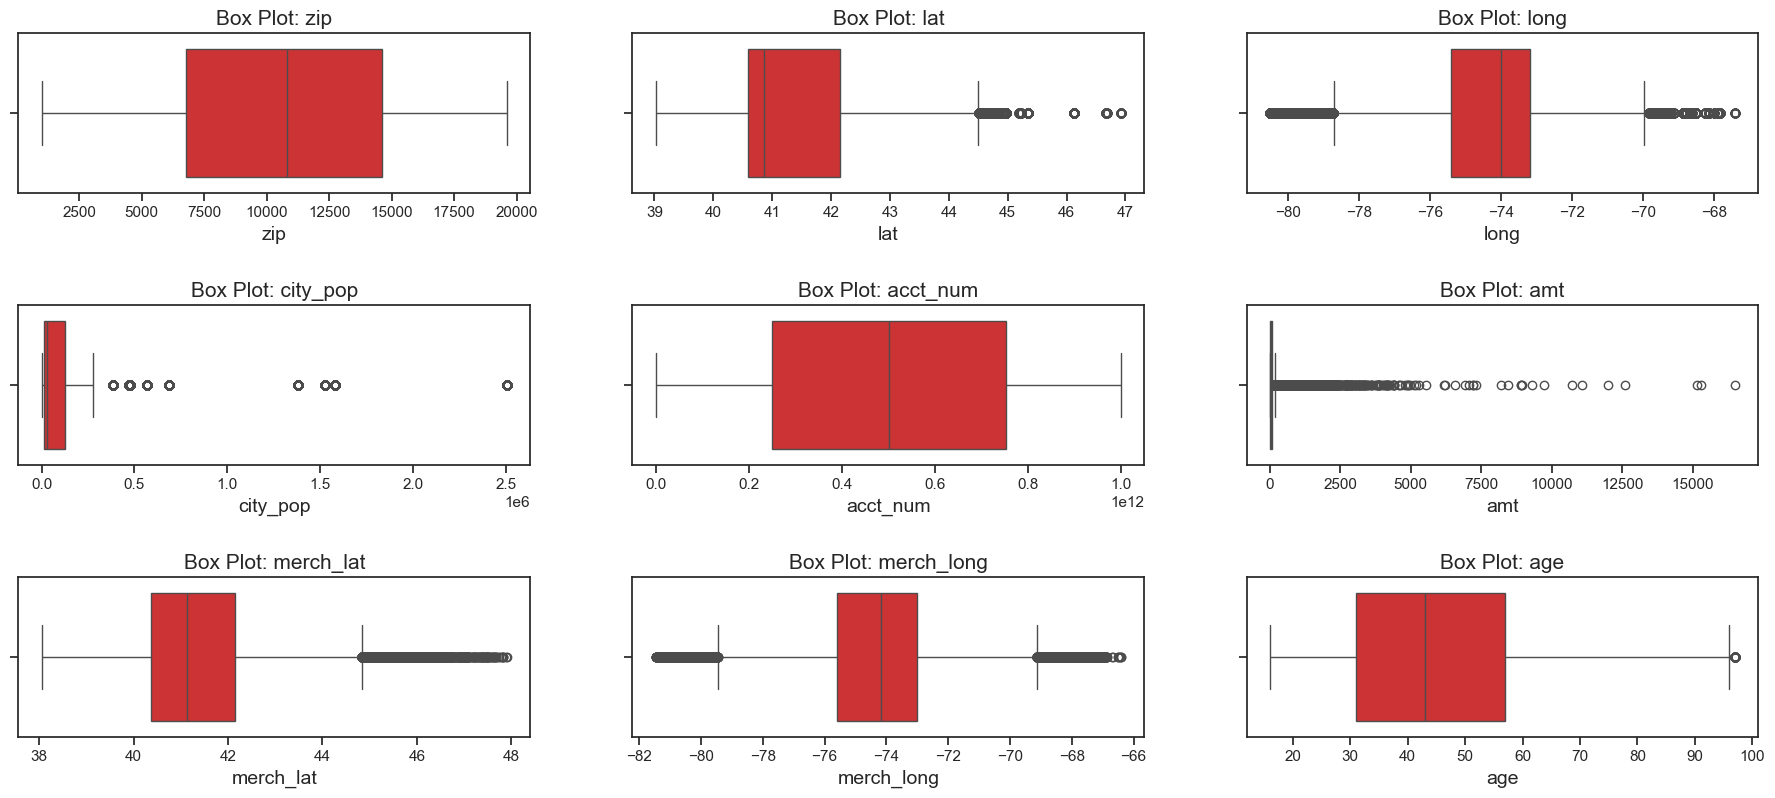

In [115]:
plt.figure(figsize=(20,200))

def outliers_boxplot(df_num):
    for i, col in enumerate(df_num.columns):
        if col != 'income':
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df_num, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(df_num)

In [182]:
import pickle
with open('fruad_EDA_protocol.pkl', 'wb') as f:
    pickle.dump(df_protocol, f)

print("fruad_EDA_protocol saved as a pickle file.")

fruad_df2 saved as a pickle file.


In [120]:
with open('EDA.pkl', 'wb') as f:
    pickle.dump(df, f)

print("EDA saved as a pickle file.")

EDA saved as a pickle file.


In [116]:
with open('fruad_num_EDA.pkl', 'wb') as f:
    pickle.dump(df_num, f)

print("fruad_num saved as a pickle file.")

fruad_num saved as a pickle file.


In [117]:
with open('fruad_dummy_EDA.pkl', 'wb') as f:
    pickle.dump(df_dummy, f)

print("fruad_dummy saved as a pickle file.")

fruad_dummy saved as a pickle file.


In [118]:
with open('fruad_category_EDA.pkl', 'wb') as f:
    pickle.dump(df_category, f)

print("fruad_category saved as a pickle file.")

fruad_category saved as a pickle file.


In [119]:
with open('fruad_text_EDA.pkl', 'wb') as f:
    pickle.dump(df_text, f)

print("fruad_text saved as a pickle file.")

fruad_text saved as a pickle file.


# OUTLIERS DF

IQR method for identifying outliers to set up a boundary outside of Q1 and Q3

In [121]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in df_num:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df_num[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(df_num).sort_values('Percent', ascending=False)
outliers_df

Outlier count   Percent 
city_pop       42765.0     17.120929
long           25148.0     10.067979
merch_long     14951.0      5.985619
amt            14035.0      5.618900
lat             4957.0      1.984531
merch_lat       3479.0      1.392815
age               92.0      0.036832

Labeling every outlier with 'Outlier'

In [122]:
def outliers(df):
    label_out_df = df_num.copy()
    for col in label_out_df:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df
new_df_outliers = outliers(df)
new_df_outliers

zip    lat       long   city_pop    acct_num     amt    merch_lat   \
185       7005  40.9115   -74.414   15269   826475243361    81.83  41.497516   
186       7005  40.9115   -74.414   15269   826475243361    68.48  40.661566   
187       7005  40.9115   -74.414   15269   826475243361     9.54  41.655939   
188       7005  40.9115   -74.414   15269   826475243361     2.93  40.062355   
189       7005  40.9115   -74.414   15269   826475243361      1.3  41.285106   
...        ...      ...       ...      ...           ...      ...        ...   
1364531  12414  42.2276  -73.8985   10510   846920444376  Outlier  41.833756   
1364532  12414  42.2276  -73.8985   10510   846920444376    53.08  41.820045   
1364533  12414  42.2276  -73.8985   10510   846920444376  Outlier  42.991588   
1364534  12414  42.2276  -73.8985   10510   846920444376    66.31  42.047309   
1364535  12414  42.2276  -73.8985   10510   846920444376    79.09  42.359574   

         merch_long age  
185      -74.258973  22  
186       -73.84918  22  
187      -75.234739  22  
188      -74.923742  22  
189      -74.645948  22  
...             ...  ..  
1364531  -74.700726  57  
1364532   -74.55525  57  
1364533  -73.760047  57  
1364534  -73.327625  57  
1364535  -74.229708  57  

[249782 rows x 9 columns]

Crearting df_outliers with dummies

In [123]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

zip  lat  long  city_pop  acct_num  amt  merch_lat  merch_long  age
185       0    0     0       0         0      0       0           0       0 
186       0    0     0       0         0      0       0           0       0 
187       0    0     0       0         0      0       0           0       0 
188       0    0     0       0         0      0       0           0       0 
189       0    0     0       0         0      0       0           0       0 
...      ...  ...   ...       ...       ...  ...        ...         ...  ...
1364531   0    0     0       0         0      1       0           0       0 
1364532   0    0     0       0         0      0       0           0       0 
1364533   0    0     0       0         0      1       0           0       0 
1364534   0    0     0       0         0      0       0           0       0 
1364535   0    0     0       0         0      0       0           0       0 

[249782 rows x 9 columns]

creating df without ouliers so we can compare the corr and distribution in both datasets

In [124]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

A table indicating changes

In [125]:
df_num = df_num.drop(['zip'], axis=1)

In [126]:
df_num = df_num.drop(['acct_num'], axis=1)

In [127]:
from scipy.stats import norm, ks_2samp
import numpy as np
import pandas as pd

c = df_num
names = c.columns

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = df_num.copy()
np.seterr(divide='ignore', invalid='ignore')

rows = []  # Collect rows here to avoid repeatedly modifying the DataFrame
for i in names:
    # Data with outliers
    out = df[i]
    # Data without outliers
    non = df[i].loc[df_outliers[i] == 0]
    # Labels with outliers
    is_fraud_out = df['is_fraud']
    # Labels without outliers
    is_fraud_non = df['is_fraud'].loc[df_outliers[i] == 0]
    
    # Correlation p-value
    p, pvalue = cocor(out, is_fraud_out, non, is_fraud_non)
    cor_change = np.where(pvalue < 0.05, '+', '-')
    # Outliers count
    mv = df_outliers.sum()
    # KS test p-value
    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')
    
    # Append the data as a dictionary
    rows.append({
        'feature': i,
        'outliers_cnt': mv,
        'distribution_changed': dist_change,
        'correlation_changed': cor_change
    })

# Use pd.DataFrame to create out_df from rows
out_df = pd.DataFrame(rows)

# Display the first 10 rows
out_df.head(10)

feature    \
0         lat   
1        long   
2    city_pop   
3         amt   
4   merch_lat   
5  merch_long   
6         age   

                                                                                             outliers_cnt                                                                                            \
0  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
1  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
2  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
3  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
4  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
5  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
6  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   

  distribution_changed correlation_changed  
0           +                    -          
1           +                    +          
2           +                    -          
3           +                    +          
4           +                    -          
5           +                    +          
6           +                    +

In [128]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change both corr only
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

feature    \
0         lat   
1        long   
2    city_pop   
3         amt   
4   merch_lat   
5  merch_long   
6         age   

                                                                                             outliers_cnt                                                                                            \
0  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
1  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
2  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
3  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
4  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
5  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
6  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   

  distribution_changed correlation_changed drop  
0           +                    -          yes  
1           +                    +           no  
2           +                    -          yes  
3           +                    +           no  
4           +                    -          yes  
5           +                    +           no  
6           +                    +           no

In [129]:
# Getting relevant columns and features
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

feature    \
0        lat   
2   city_pop   
4  merch_lat   

                                                                                             outliers_cnt                                                                                            \
0  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
2  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   
4  zip               0
lat           34126
long          83963
city_pop      53206
acct_num          0
amt           31703
merch_lat     39861
merch_long    71421
age           28415
dtype: int64   

  distribution_changed correlation_changed drop  
0           +                    -          yes  
2           +                    -          yes  
4           +                    -          yes

In [130]:
# Getting relevant columns and features
relevant_columns_features=out_df.loc[out_df['drop']=='yes']['feature']
relevant_columns_features

0          lat
2     city_pop
4    merch_lat
Name: feature, dtype: object

#### Outliers result:

This df does not have outliers, city population outliers may give us usfull information therfore this outliers will not be deleted.

In [134]:
# # List of outlier columns to remove
# remove_outliers=['unix_time']
# remove_outliers

In [135]:
# # Copying and manipulating data based on outliers
# manipulated_data= df_num.copy()
# for j in range(len(df_num)):
#     for col in remove_outliers:
#         if df_outliers.iloc[j][col] == 1:  # Use .iloc for row access by index position
#             manipulated_data.iloc[j][col] = 0


In [137]:
# manipulated_data

In [138]:
# #Checking to see the outlier = yes on manipulated data is gone on df
# manipulated_data.loc[df[('unix_time')] == 'yes']

In [139]:
# msno.matrix(manipulated_data)

In [140]:
# manipulated_data.to_pickle('df_cleaned.pkl')